# Assignment \# IV:  Decision Tree

## Problem statement

In clinical informatics, machine learning has been widely exploited to diagnose diseases. In this project, we will design a method for a medical diagnosis using machine learning that determines whether a patient has diabetes or not. To this end, we will implement a $Decision Tree$ model, and train/test the model with the Pima Indians Diabetes Data Set. The dataset provides the following information (features) for each patient.

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

A total number of samples (patients) are 768, where 500 patients are chosen as training samples ($\texttt{diabetes_training_data.csv}$), and the remaining 268 patients are test samples ($\texttt{diabetes_test_data.csv}$).

### P1. Decision Trees

P1.1 Implement a decision tree method for classification (```DecisionTrees``` class) (*60 points*) 

> **Instruction:** 
>
>The main design choice we would consider for the decision tree is the criterion for selecting the best split for each node. Instead of the classification error, we will implement a binary decision tree in this project by choosing features and thresholds that yield the largest improvement in terms of the **Gini impurity** at each node. That is, we  choose the features and thresholds greedly providing the minimum **weighted Gini impurity** for each node. Concretly, let's denote by $H$ a function computing the Gini impurity. The weighted Gini impurity for the $j$th feature and the $t$the threshold value is then defined as follows:
>
>\begin{equation}
G(j,t) = \Big(\frac{N_\text{left}}{N}\Big) H(M_\text{left})  + \Big(\frac{N_\text{right}}{N}\Big) H(M_\text{right}),
\end{equation}
>
>where $M_\text{left}$ and $M_\text{right}$ are subsets of training samples for left and right nodes, respectively, which are splitted from training samples of a parent node (e.g., diabetes for the left node and normal for the right node), according to the feature and threshold. This suggests that $M_\text{left}$ and $M_\text{right}$ could vary for different choices of features and thresholds, and our objective is to find the features and thresholds that give the minumum weighted Gini impurity for each node as follows:
>
>\begin{equation}
(j^*, t^*) = \operatorname{argmin}_{j, t}  G(j, t).
\end{equation}
>
>This process is repeated until reaching at least one of stopping condtions.
>
>
> **Gini impurity:**
>
> Gini impurity measures the *impurity* of nodes and it is computed by 1- Gini. More formally, it can computed by summing the probability of an item labeled with the class i being chosen (denoted by $p_i$) times the probability  of a mistake in categorizing that item (i.e., $\sum _{k\neq i}p_{k}=1-p_{i}$). That is,
>
>\begin{equation}
{I}_{G}(p)=\sum_{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-p_{i}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}p_{i}^{2}=1-\sum _{i=1}^{J}p_{i}^{2},
\end{equation}
>
>where $i\in \{1,2,...,J\}$, and $J$ is the number of classes. The Gini impurity reaches its minimum (zero), when all samples in the node fall into a single class. This suggests that the optimum split for the decision tree could be chosen by the features and thresholds with less Gini impurity. See for more details [Wiki](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)  
>
>
> **Implementation details:**  
> 1. We implement the decision tree using a Python dictionary data structure in a *Depth First Search (DFS)* manner. Each node could have various attributes, e.g., `feature`, `threshold`, `left`, `right`, `impurity`, `is_leaf`, and `prediction`. 
> 2. If we reach a leaf node, the prediction is done by the majority class.
> 3. Stopping condition
>> - All samples in a node have the same target value 
>> - No more features to split on
>4. Early stopping condition  
>> - The maximum depth level of a tree (`max_depth`) is reached.
>> - The data samples for a node is below `min_split`.
>> - The split does not improve the weighted Gini impurity.
>
>5. Hint: Use indicies and sorting for efficiency


P1.2 Plot the depth, the number of nodes and the classification accuracy on training samples and test samples by varying maximum depth levels of a decision tree from 1 to 15. (*10 points*)

P1.3 Implement a `traverse(self)` function that performs a *Breadth First Search (BFS)* on a (binary) decision tree to parse its properties, e.g., impurities of nodes, types of nodes, decision paths, and predictions. See the results below (**P1.3**) for example. (*10 points*)

In [ ]:
from DecisionTree import *

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

## Results

### Prepare training samples

In [5]:
train_csv_path = 'diabetes_training_data.csv'
test_csv_path = 'diabetes_testing_data.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [6]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [7]:
X_train, y_train = load_data(df_train)
X_test, y_test = load_data(df_test)

### Instantiate a decision tree classifier

In [8]:
my_clf = DecisionTree(max_depth = 4, min_splits = 5)

### P1.1


In [9]:
my_clf.fit(X_train, y_train)

In [10]:
y_pred  = my_clf.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.85
test accuracy: 0.6753731343283582


### P1.2

100% (15 of 15) |########################| Elapsed Time: 0:00:45 Time:  0:00:45


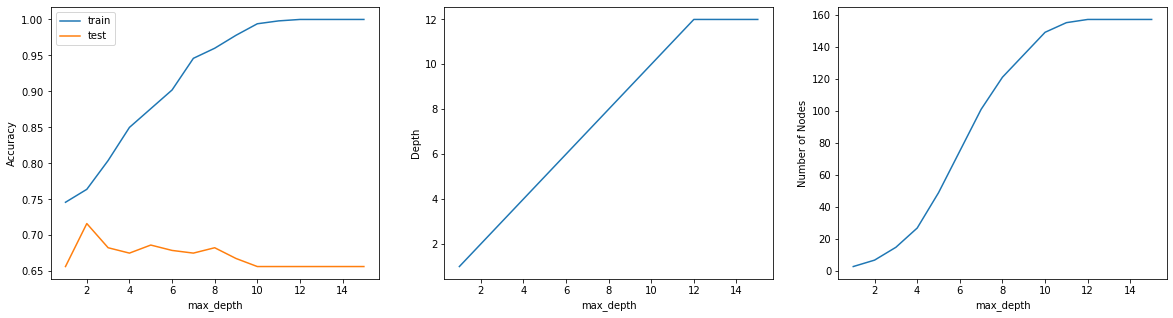

In [11]:
plot_graph(X_train, X_test, y_train, y_test, min_splits = 2)

### P1.3

In [12]:
my_clf.traverse()

depth: 0--------------
node=0 is a split node: 
go to left node 1 if self.X[:, 1] <= 0.6156 else to right node 12: 
Impurity: 0.4526, Improvement:0.1014, Prediction -> 0, count: 500
depth: 1--------------
node=1 is a split node: 
go to left node 2 if self.X[:, 0] <= 0.3824 else to right node 7: 
Impurity: 0.2589, Improvement:0.0285, Prediction -> 0, count: 288
node=12 is a split node: 
go to left node 13 if self.X[:, 1] <= 0.7764 else to right node 20: 
Impurity: 0.4765, Improvement:0.0619, Prediction -> 1, count: 212
depth: 2--------------
node=2 is a split node: 
go to left node 3 if self.X[:, 5] <= 0.6788 else to right node 6: 
Impurity: 0.1877, Improvement:0.0196, Prediction -> 0, count: 248
node=7 is a split node: 
go to left node 8 if self.X[:, 1] <= 0.4447 else to right node 9: 
Impurity: 0.4950, Improvement:0.1176, Prediction -> 0, count: 40
node=13 is a split node: 
go to left node 14 if self.X[:, 5] <= 0.4463 else to right node 17: 
Impurity: 0.4975, Improvement:0.0446, Predi


## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation of a decision tree method,
- Comparison of two crieteria (the Gini index vs. the classification error),
- Analysis of the results from P1. 
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).


### Implementation of Decision Tree

Each node is made as a dictinary type. These nodes are stacked in DecisionTree object's tree property. Therefore, we can find each node when we know the index of the node, by writing tree[i]. 
<p> Each node starts with having 'data', 'state', and 'depth' properties. Data records the data from the training sample that should be divided from the node. State shows how far the node was processed - 0: the node should find the best split, 1: left node was made, right node should be made, 2: all nodes below are made. Depth records the depth of the node.</p>
<p> There are three variables for the function. 'current_node' records which node we are processing. 'next_node' records which index in the tree is empty and therefore the place the next node made should be placed at. 'repeat' is used for the while loop. It tells whether the tree is fully made and the loop should end. </p>

#### Node Processing

Each time a node is visited (inside the while loop), the node's state tells what is needed for the node. When the node is first visited after creation, the node's state would have 0. 
<p> In this case, we first see if Stop Conditions are met(node's samples are smaller than min_split, maximum depth reached, are impurity = 0). If the conditions are met, the node is made into a leaf node using the leaf_node function. The node is replaced with the object returned from the function. </p>
<p> If the conditions aren't met, we find the best split by using the data stored in  the node's 'data' property. Then we again see if the result meets the stopping conditions (data wasn't split, split does not improve gini impurity.) If the conditions are met, the node is made into a leaf node.</p>
<p> If not, splitted samples are each stored in 'left' and 'right' properties of the node. Then, a new node for the left is first made. In this new node, the left samples are saved as data. And record next_node(which is the index of the left node in the tree) as 'left' of this node so that we can move to this left node when needed (usually when predicting). Then, we add current_node by 1. As a result, in the next while loop, the newly made left node is processed. </p>
<p> When all the left nodes are processed by reaching a leaf node, current_node is decreased by 1. In this case, we get to move the tree upwards until we find a node with a status with 1. (when newly visited node's status is '2', current_node is again decreased by 1. Therefore, we continue moving upward.) If we find a node with status 1, we make a right node of the node. The samples for the right node is stored in 'right' property. Just like when we made the left node, we make a new node and save the samples in 'data' property. Then we record the index of the new node in 'right' property of the parent node. Then, we change current_node to this new node's index and proccess the right node. </p>
<p> When we repeat this process, we can make the tree in DFS manner. </p>

#### Computing Gini Impurity

Gini impurity is 
>\begin{equation}
{I}_{G}(p)=\sum_{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-p_{i}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}p_{i}^{2}=1-\sum _{i=1}^{J}p_{i}^{2},
\end{equation}

In our implementation, there are only two classes. The equation reduces to 
>\begin{equation}
{I}_{G}(p)=2p_{0}p_{1} = 2p_{0}(1-p_{0})
\end{equation}

Therefore, we count the number of zeros and ones from the given sample. Then, using the result, we can calculate $p_{0}$ and $p_{1}$. Therefore, we can calculate gini impurity.

<p> If one of the two samples - left and right - is empty, the calculated gini impurity is returned.</p>

<p> If not, we calculate two gini impurities for each samples and calculate the weighted gini impurity (gini_score). The gini_score is returned</p>

#### Finding the Best Split

To find the best split, we try splliting for all features and possible thresholds. 
<p> First, we try all features using for loop (for i in range(len(self.X[0])). Inside this loop, we first copy the values the samples have for the feature. Then, we eliminate duplicated values and sort the values in descending order. Then, we find the midpoints of each values. The midpoints are stored in thresholds list.  </p>
<p> Then, each midpoints are tried as a threshold from the largest to smallest. The samples are divided using the threshold and gini impurity is calculated. If the gini impurity is smaller than the previous smallest gini impurity, the feature, threshold value, impurity, and left and right indexes are stored.</p>
<p> After trying all features and thresholds, the best split (which makes the smallest gini impurity) is found and returned.</p>


### Comparing Gini index and the classification error

Gini Impurity shows how impure a give sample is. It calculates errors for all possible options - if the answer was 0, and if the answer was 1. On the other hand, classification assumes the mode as the answer, and calculates the error. We can calculate Gini Impurity and Classification error using formulas below.

>\begin{equation}
{I}_{G}(p)=\sum _{i=1}^{J}p_{i}(1-p_{i})
\end{equation}
>\begin{equation}
{I}_{C}(p)=1-argmax(p_{i})
\end{equation}

To see the difference, I made a tree that uses classification error instead of gini impurity.

In [13]:
class DecisionTreeClassification(DecisionTree):
    # A new Decision Tree class which uses Classification Error
    def __init__(self, max_depth, min_splits):
        super().__init__(max_depth, min_splits)
    
    def compute_classification_error(self, left_index, right_index):
        # Computes Classification Error
        # If either one is empty index, returns classification error
        # If neither are empty, returns weighted classification error
        #left
        zeros = 0
        ones = 0
        if(not len(left_index)):
            C1 = 0;
            total_l = 0;
        else:
            for i in left_index:
                ones += self.y[i]
                zeros += (1 - self.y[i])
            total_l = zeros + ones

            if(total_l == 0):
                C1 = 0
            else:
                C1 = min([ones, zeros])/total_l
        
        
        zeros = 0
        ones = 0
        if(not len(right_index)):
            C2 = 0;
            total_r = 0;
        else:
            for i in right_index:
                ones += self.y[i]
                zeros += (1 - self.y[i])
            total_r = zeros + ones

            if(total_r == 0):
                C2 = 0
            else:
                C2 = min([ones, zeros])/total_r
        
        total = total_l + total_r
        
        gini_score = C1 * total_l/total + C2 * total_r/total
        
        return gini_score
    
    
    def best_split(self, index):
        # Overwrites best_split function
        """ 
        Description:
            Find the best split information using the classification error and return a node

        Args:
            index (numpy array): indice of data of a node

        Returns:
            node (dict) : a split node that include the best split information(e.g., feature, threshold, etc.)
        """
        ### CODE HERE ###
        #raise NotImplementedError("Erase this line and write down your code.")
        #selected results
        sel_feature, sel_value, sel_score, sel_left, sel_right = INFINITY, INFINITY, INFINITY, None, None
        
        for i in range(len(self.X[0])):
            # for each features            
            # find best threshold for given feature
            keys = []
            for m in index:
                keys.append(self.X[m, i])
            
            keys = list(set(keys))
            keys.sort(reverse=True)
            thresholds = []
            for m in range(len(keys) - 1):
                thresholds.append((keys[m]+keys[m+1])/2)
            
            
            for threshold in thresholds:
                left = []
                right = []
                for m in index:
                    if self.X[m][i] <= threshold:
                        left.append(m)
                    else:
                        right.append(m)
                # Note Classification Error
                gini = self.compute_classification_error(left, right)
                
                if(gini < sel_score):
                    sel_feature, sel_value, sel_score, sel_left, sel_right = i, threshold, gini, left, right
            
        
        return {'feature': sel_feature, 'threshold': sel_value, 'impurity': sel_score, 'left': sel_left, 'right': sel_right, 'done': False}

Then, using this new code, I build the model with same training data and conditions.

In [14]:
my_clf_classification = DecisionTreeClassification(max_depth = 4, min_splits = 5)
my_clf_classification.fit(X_train, y_train)
y_pred  = my_clf_classification.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_classification.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.8
test accuracy: 0.7052238805970149


In [15]:
my_clf_classification.traverse()

depth: 0--------------
node=0 is a split node: 
go to left node 1 if self.X[:, 1] <= 0.7261 else to right node 10: 
Impurity: 0.4526, Improvement:0.2226, Prediction -> 0, count: 500
depth: 1--------------
node=1 is a split node: 
go to left node 2 if self.X[:, 5] <= 0.6773 else to right node 7: 
Impurity: 0.3492, Improvement:0.1419, Prediction -> 0, count: 386
node=10 is a split node: 
go to left node 11 if self.X[:, 5] <= 0.3443 else to right node 12: 
Impurity: 0.3706, Improvement:0.1600, Prediction -> 1, count: 114
depth: 2--------------
node=2 is a split node: 
go to left node 3 if self.X[:, 0] <= 0.8235 else to right node 6: 
Impurity: 0.3313, Improvement:0.1244, Prediction -> 0, count: 377
node=7 is a split node: 
go to left node 8 if self.X[:, 1] <= 0.4573 else to right node 9: 
Impurity: 0.1975, Improvement:0.1975, Prediction -> 1, count: 9
node=11 is a leaf node: Impurity: 0.0000, Prediction->0, count: 4
node=12 is a split node: 
go to left node 13 if self.X[:, 6] <= 0.0246 el

From the above result, we can see that two methods give similar but different trees. It is because classification error and gini impurity gives different values for same given samples.

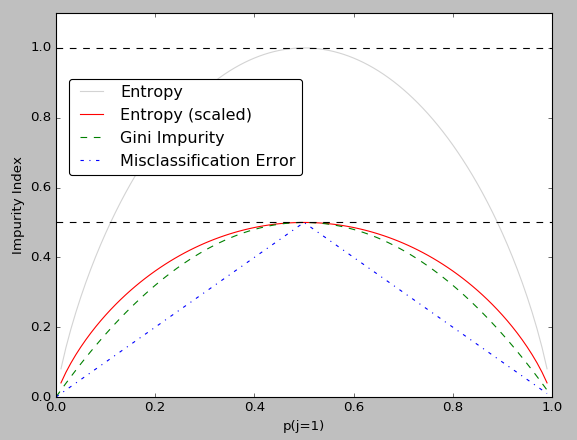

In [16]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAkEAAAG4CAIAAADNE6S2AAAAA3NCSVQICAjb4U/gAAAAGXRFWHRTb2Z0d2FyZQBnbm9tZS1zY3JlZW5zaG907wO/PgAAIABJREFUeJzs3XlYE9faAPAzk40EkpAVwr4JqMUFq9BFUBRX1Gqv4i6i1oreurSX1uUqtrUWrVVbl6qtimvRqhWVSq2lalvB2tqqtbIpIPsSSCCBQJL5/pjefGlAIZqQhff3+PgkZyYz78SYN+fMWbDMzEwEAAAA2CDc0gEAAAAATwlyGAAAAFsFOQwAAICtghwGAADAVkEOAwAAYKsghwEAALBVkMMAAADYKshhAAAAbBXkMAAAALYKchgAAABbBTkMAACAraJaOoBO0Wq1tbW1TCYTwzBLxwIAAODpEQTR1NQkEAhw3ASVKNvIYbW1tVOmTLF0FAAAAEzjxIkTIpHo2Y9jGzmMyWQihB49esThcCwdi7VbtWrVBx98YOkobAC8UZ0H71UnwRvVGXK53NPTk/xWf3a2kcPIJkQOhwM5rEN0Oh3epc6AN6rz4L3qJHijOs9UN4agTwcAAABbBTnM3owcOdLSIdgGeKM6D96rToI3qutBDrM38L+ok+CN6jx4rzoJ3qiuBzkMAACArYIcBgAAwFZBDgMAAGCrIIcBAACwVZDDAAAA2CrIYQAAAGwV5DAAAAC2CnIYAAAAWwU5DAAAgK2CHAYAAMBWQQ4DAABgqyCHAQAAsFWQwwAAANgqyGEAAABsFeQwAAAAtgpyGAAAAFsFOQwAAICtghwGAADAVkEOAwAAYKsghwEAALBVkMMAAADYKshhAAAAbBXkMAAAALaKau4TfP/992fPni0oKGhqarp06RKOt5M1Gxsbt23blp2djWFYeHj4G2+84eTkZO7AAAAA2Dqz18M4HM6ECRMWL178hH3ef/99mUx27NixI0eOSKXSDz/80NxRAQAAsANmz2HPP/98VFSURCJ53A6VlZU3btxISEhgs9kcDmfRokU///xzdXW1uQMDAABg6yx/Pyw/P59Go/n6+pJP/f39qVRqfn6+ZaMCAABg/Syfw5RKpcHdLycnJ4VCYal4AAAA2Aqz9+noEIvFMshYjY2Njo6ObfeUy+UGJY6OjhQKRb9Eo9G0zX8MBoPBYBgUNjY2arVa/RIcx9v2JVGpVCqVCs4L533G8xIEodFoWltb1Wq1VqtVKpVNTU1arVar1RL/w2QyKRQKpocgiObmZhzHKRQKjuNUKpVGo7FYLAcHByu/XjgvnPdx5237Tf4sLF8PCwgIaG1tffjwIfm0oKBAo9EEBAS03dPT05P7T/fv3zfY5/79+9w2Nm7c2PZoYWFhBruFhYW13W3jxo1tDwjnhfN2/rz9+/fPycn5888/79+/X1hYWF5eXlNTk5yc7O/v36NHj6CgoODg4J49e/bq1au4uJjBYNDpdCqVSvbgvX//vr+/v6+vr5eXl4eHh6urq0AgWLFiRU5OTkFBQXFxcWVlZV1dnUKhsJ7rhfPCeds9b0ZGRnx8PJfL9fT0bHuEp4ZlZmaa8HBtabVatVr9xx9/vPPOOxcuXMBxnEajYRimv8+qVavUavXq1asRQu+//76Dg8N7772nv4NCoYiJiXn06BGHw9Evt7bfF3DebnherVarUqma/6e2tlatVpMVJjIhMRgMZ2dnGo2my0zPcl6tVkvWydRqdUtLS0tLi0qlamlpkcvlGIYxGAwHBwfybxaLxWazTX69BoV2/+8L5zVHPczT0/P8+fPttrcZy+w57OLFi5s2bSKTFkEQGIZ9/PHHEokkLi4uOTk5JCQEIdTY2Lh9+/br169jGPbCCy8sXbrU4NrIHCaTyQxyGAAWoVarlf/T1NSEYZjDP7U7DtKstFpt8z+RjZOs/6FSLX/jAACEkFwu53K5NpPDTAJyGLA48idkY2OjQqFQqVQMBkOXHuh0ukHTgsURBKFSqZqamshESwbs6Ojo5OTU9tcxAF3JtDkMfpoB8FhkJpDL5Q0NDU1NTXQ63cnJycXFxfrTgK5qyOPxkF4CrqioaGlpYTKZ5HBMBoNhbdkXAKNADgPAEEEQCoWioaFBLper1Wo2m83n8x0dHel0uqVDe0oUCoXD4ZDNGC0tLeTVVVdXU6lUDofDZrMdHR0hmQFbBDkMgL8RBNHU1FRfXy+TyTAMY7PZbm5ujo6OXX9zy6zodDqdTufxeFqtlrzBXlJSQhAEl8t1dnZmMpmQzIANgRwGAFKpVHV1dTKZTKvVcjgcT0/P7lAvwXGczWaz2Wyy3imTyYqKinAc53K5PB6vbRc1AKwQ5DDQfWm1WplMVldX19TUxOFwJBKJk5OTndW6OgPDMCcnJycnJ4lE0tjYKJPJ8vPzmUwmj8fjcrnd8A0BNgRyGOiOmpubpVJpfX09jUbj8XheXl7Q9RwhhOM4edtMrVbX19fX1NSUl5c7Ozvz+fy2M4MAYA3g/y3oRgiCaGhoqK2tVSqVXC7Xx8cHbv+0i0qlCoVCgUDQ1NQklUoLCgpYLJZAIGCz2fB2AasCOQx0CxqNpq6urra2liAIPp/v6ekJFa8OYRhGDoBzdXWVSqVlZWUYhgkEAh6PZ+VDC0D3Af+NgZ1Tq9W1tbVSqZROp7u4uHC5XKhJGItKpYrFYpFIJJPJamtrq6urBQIBn8+H3wHA4uAjCOxWa2trTU1NXV0dk8nsJl0NzQrDMGdnZy6Xq1Aoqqura2pqeDyeUCik0WiWDg10X5DDgB1Sq9XV1dVSqdTJycnHx4fFYlk6Ivuh68SoVCqrq6tzc3P5fL5IJII6GbAI+NgBu6JWq2tqaqRSqaOjo7+/P/SmMx8Wi+Xt7d3c3FxZWanLZHCfDHQxyGHATmi12pqampqaGiaTCXWvLuPg4ODt7a1UKisrK3NycoRCoVAohCFloMtADgM2jyCI+vr6yspKGo3m7e1tksmwgVFYLJavr69CoaioqJBKpS4uLs7OznD3EXQByGHAtpFzsWs0GolEwuFw4HvTghwdHf38/ORyeUVFRW1traura9vFEgEwLchhwFa1tLSUl5crFAqRSCQQCKD9yhpgGMblctlsdm1tbXFxsaOjo0Qisd35/oH1gxwGbA9566u6utrZ2TkwMBB6xFkbHMdFIhGPx6usrMzLyxOJRHCTDJgJ/OcHNqahoaG8vBzHcV9fX+i4Yc2oVKq7uzuPxysrK6uvr5dIJGw229JBAXsDOQzYjNbW1vLy8sbGRhcXFz6fD7e+bAKLxfL395dKpY8ePSKnxocx0cCEoHYPbABBEHV1dXl5eRiGBQYGCgQCSGA2hJxlMTAwEMOw/Pz8uro6giAsHRSwE1APA9aupaWlrKysubnZw8ODw+FYOhzwlKhUqqenp1wuLysrk8lkbm5u0NcDPDvIYcB6EQQhlUorKyu5XK6npyfMAWEHOByOo6NjRUVFfn4+tAmDZwc5DFip1tbWkpKSlpYWLy8vGGZkTygUiru7O5fLLS0tlcvlHh4ecIcMPDW4HwaskUwmy8/Pp9FoAQEBkMDskpOTU0BAAI1Gy8/Pl8lklg4H2CqohwHrotFoysrKGhsb3dzcuFyupcMBZkShUDw8PGQyWVlZmVwud3Nzg+ZiYCyohwErolAo8vPzNRpNQEAAJLBugsvlBgQEaDSa/Px8pVJp6XCAjbHbephCodBoNJaOAnQWQRDkAsEuLi48Hq+pqampqcnSQXUFCoUCkxSTkzXX1tY+fPhQLBYLhULo6AE6yQ5z2K5du9auXVtbW2vpQADoFIFA8O677yYkJFg6EEvCMEwoFDo6OhYXFysUCg8PD5hCDHSGvX1Kdu3atXLlymPHjoWFhcHoE2D9WlpasrOzp0+fjhDq5mkMIcRkMgMCAkpLS/Pz8z08PKA7D+gQlpmZaekYOqZQKGJiYmQyWYdDXIVCYUpKytixY7smMABM4sKFC3FxcdXV1ZYOxCqQ07KUl5dDu6JdksvlXC73/PnzJmlFt6s+HQqFora2NiwszNKBAGCcsLCwmpoahUJh6UCsAoZhfD7fz8+PnGURbmyDJ7CrHEZ+1qEJEdgc8kMLX9b6mEymv7+/RqN58OCBSqWydDjAStlVDgMA2BMqlerj48NmswsKCuRyuaXDAdYIcliXSklJwdvg8/kdvrCoqGj9+vWFhYXmjxEAK4JhmKurq7u7e0lJSXV1NUx4DwzYW79E64dh2FdffeXu7q4r6Uwf4sLCwvXr1w8ePNjHx8eMwQFglbhcLp1OLyoqUqlUbm5usCQ00IEcZgF9+/b18/Mz6iUEQXTYO6u1tRXmTgX2irw9VlxcXFhY6OXlBaPHAAl+zliLgwcP4jienZ09c+ZMLpfr7u6+dOnSlpYWhNCVK1eioqIQQsOHD8dxnEKhXL16FSHk4+Mza9asAwcO9OzZk8FgpKenI4QqKipmz54tEokcHBz69u179OhR3SnIlsxr165NnDiRzWYLhcIlS5Y0NzcjhFpaWsRi8Ztvvtk2pNzc3K58HwB4HBqN5uvrS6PRCgoKyM8tAJDDLEDzT2QTP1nNmj17dkBAwJkzZxISEnbu3Llx40aEUGho6M6dOxFCO3bsyMrKun79emhoKPmSzMzMrVu3JiUlXbx4sU+fPkqlMiIiIiMj48MPPzx79myfPn1mzZr1+eef65991qxZPXr0OHPmzIoVK/bt20eOq6XT6XPnzk1JSSGzJmnv3r1Dhw4NDAzswvcGgCfBcdzDw4PH4z148KCxsdHS4QDL6171cYIgtFqtSQ6F4/jTDb0kCCIoKEi/JCYmJi0tjXw8Y8aMtWvXIoSioqKysrKOHz++bt06Npvdq1cvgiCCg4MHDRqk/9r6+vpbt26JRCLy6Y4dOwoKCn744YfBgwcjhEaOHFlRUbFmzZp58+bpoh07duymTZsQQsOHD0cIrVu3btWqVQEBAYsWLdqyZcvJkydnzJiBELp9+3ZWVlZqaupTXCMA5oNhmFgsptFoRUVFbm5uPB7P0hEBS+peOUyr1f71118mOVTPnj2fbp0IDMO+/vpr/T4dzs7Ouk1jxozRlYeEhFy+fPnJRwsPD9clMITQtWvX3N3dyQRGmjlzZnx8/L1793r37k2eYvLkybqtU6dOXbNmzY0bNwICAnx8fEaOHLlnzx4yh+3Zs0csFk+cOPEprhEAc+PxeDQarbi4WK1Ww1we3Vn3ymE4jvfs2dNUh3rq1/bu3ftxfTr0+9kzGIwOh3ZKJBL9p1Kp1KDE1dWVLNeVuLi4GDwuLS0lnyYkJIwfP/7evXs+Pj5Hjx5NSEiAO+fAajk5Ofn6+hYVFbW2tkokEkhj3VP3+obCMMx2F9lr97+oQSGfzzfoglFRUYEQEggEupLKykpdIq+srEQI6SqFY8aM8fb23rNnT58+fRobGxcsWGDSKwDAxJhMpp+fX1FRUXFxsaenJ/S574bgn9w2MBgMgiA6XFIrMjKypKTk+vXrupKjR4+KxWJd0iII4sSJE7qtx48fp1AountsGIYtXLjw0KFDO3bsGD58uK+vr6mvAwATo9Ppfn5+arW6qKgIJuvqhrpXPcwaEARx69YtgxnKn3/++Se/KjAwkEql7t+/n8fjMRiM4ODgdqd8jouL2759+6RJk95//30PD48jR45cvnx57969+tW19PT0xMTEESNGZGdnv/vuu3PmzAkICNBtnTdvXlJS0u3bt0+fPv1sFwpAF6FQKGSjYmFhobe3NzSAdyvwj93VMAybMmWKQeHjFt3Q5R4+n79z587k5OQhQ4ZoNJrMzMyIiAgMwwzaElks1tWrVxMTE1euXNnQ0BAUFHTkyJFp06bpH/DIkSMfffTRZ599RqfTFy5cuHnzZv0jCIXCyMjIu3fvjhs3zgRXC0CXwHHc29u7pKTk4cOHPj4+MNi/+7Cr9cPIZWk6s8xY95SSkhIfH5+Xl/eEWULq6uq8vb1XrFiRlJTUhaF1d/DRNQmCIEpLSxUKhY+PD4PBsHQ4oH2wfhgwi5qamh9//PG1114jCGLRokWWDgcAo2EY5u7uzuFwHj58CMu1dBOQw8DfLly4EBERcfPmzUOHDun3vwfAhpDz3Ds7Oz98+BDmo+oOIId1I3PmzNFoNI9rSJwzZ45Wq3348CGMawY2DcMwFxcXHo8Haaw7gBwGALA3ZBoTCASQxuwe5DAAgH0Si8VkGutwYCWwXZDDAAB2SywWC4XCwsJCqI3ZK8hhAAB7JhKJyNoY9FS0S5DDAAB2TiQSkV089JfHA/YBchgAwM6RXTy4XC6kMfsDOQwAYP/IcWNsNruwsLC1tdXS4QCTgRzWdVJSUvA29BcMe4KioqL169cXFhaaOUbj/Pvf/54wYYKZDn7w4EEcx4uLi5/itVeuXMFx/OrVq+TTV155ZcmSJSaNDtgeDMMkEgmLxSosLFSr1ZYOB5gGzPnbpTAM++qrr/QXce7kHNuFhYXr168fPHiwj4+PuYIzUkFBwd69e7Oyssx0/LYzGhv7ct3jpKSksLCwZcuW6c/QD7ohcjKq4uLioqIiX19fWG/MDkAO62p9+/Z9wpS7j0MQRIdf6K2trV05Xfe2bdv69evXv3//LjvjU+vXr1+/fv22bdu2Y8cOS8cCLAzDME9PT3LZTC8vL0hjtg7+/awF2XSWnZ09c+ZMLpfr7u6+dOlS8v7zlStXoqKiEELDhw/HcZxCoZCtZD4+PrNmzTpw4EDPnj0ZDEZ6ejpCqKKiYvbs2SKRyMHBoW/fvkePHtWdgmzMvHbt2sSJE9lstlAoXLJkCTlupqWlRSwWv/nmm21DMlgYmtTS0nL06NEZM2boShQKxb///W9vb28HBwdXV9cRI0boXqjRaJKTk3v37s1kMsVi8ZgxY8hNKpVqxYoVISEhbDZbIpGMHz8+JyfnCW/Rvn37+vXrx2QyRSLR/Pnz6+rqdJtqamqmT5/O5XJ5PF5cXFx9fT1BEPqvnTp16tGjR6F3NUAI4Tju5eWlVqtLS0sNPifA5nRFPezAgQPp6ekKhSIwMHDp0qVtVwfOycnZs2dPfn4+hUIJCQlZvHixHc85q9Fo9FebxXGcrGCRf8+ePXvatGlnzpy5fv36unXr+Hz+unXrQkNDd+7cuWTJkh07dpCrZfbq1Yt8SWZm5h9//JGUlCQWi318fJRKZUREhEwm+/DDD8k1MGfNmtXU1DR//nzdGWfNmjVlypTFixffuHFj/fr1SqVy//79dDp97ty5X3zxxcaNG+l0Ornn3r17hw4dGhgY2PYqrl+/LpPJXn75ZV3JsmXLzp8/v3HjxoCAgNra2p9++qm+vp7cFBsbm5aWtnz58mHDhjU3N1+9erW8vDwwMFClUjU2Nq5du9bV1VUqle7atSs8PDwnJ0csFrc94zvvvPPxxx8vW7bso48+Ki0tXb169Z9//vnzzz+T79vEiRPv3Lnz4YcfBgQEpKam/vvf/zaotpJvy/Xr14cMGfJU/27ArlAoFB8fnwcPHpSXl0skkmdptQaWZfYc9uWXX2ZkZGzevNnNzS0lJSUxMfHw4cMODg66HQiCWLly5bBhwzZv3tzS0rJp06b33nvPXG0+BIEaGkxzKDYbGf+5JwgiKChIvyQmJiYtLU33dMaMGWvXrkUIRUVFZWVlHT9+fN26dWw2u1evXgRBBAcHDxo0SP/l9fX1t27dEolE5NMdO3YUFBT88MMPgwcPRgiNHDmyoqJizZo18+bN0/0vHTt27KZNmxBCw4cPRwitW7du1apVAQEBixYt2rJly8mTJ8na1e3bt7OyslJTU9u9kOzsbAzD+vTpoyvJysqaMWNGXFwc+VTX1+P7778/ffr0p59+unjxYrJk/Pjx5AMOh7N3717ysVarHTFihIuLy/Hjx5cuXWpwuqKioo8++mj9+vWrV68mSwIDA1966aVz586NHz/+0qVLP/30U2pq6uTJkxFC0dHRY8aMKS0t1T9C3759cRzPysqCHAZIVCqVTGNUKrXdn03AJpi9LTEtLS02NtbHx4dOp8fHx6vV6mvXrunvoFAoZDLZ6NGjKRQKk8kcMWJEQUGBuaJpaEBcrmn+PFUuxDDs7NmzN/Vs27ZNf+uYMWN0T0NCQjrslRceHq5LYAiha9euubu7kwmMNHPmzOrq6nv37ulOQX7Rk6ZOnarRaG7cuIEQ8vHxGTly5J49e8hNe/bsEYvFj5vDvqysjMPh6HdIGThw4MGDBzdu3Pjrr79qtVpd+aVLl3Ac168I6jtx4kR4eDiPx6NSqY6OjgqFot3mxEuXLhEEMX36dM3/DBw4kMPhkG2q169fp1KpkyZN0r8ugyNQqVQul1tWVtZuGKB7otPpPj4+NTU1+u3SwLaYtx6mUCgqKip0NQ8KhRIQEJCfnx8dHa3bx8nJacKECefPn1+4cGFra2tGRob+V7CJsdlIJjPZoZ5K7969n9CnQ7+rPYPB6PD+jUQi0X8qlUoNSlxdXclyXYl+Oy35WFdlSUhIGD9+/L1793x8fI4ePZqQkPC4bpPNzc0G6+Tu2LFDIpEcOHBgzZo1PB5v9uzZH3zwgYODQ21tLZ/Pb3dR3XPnzk2dOnXu3LlJSUlCoRDH8dGjR7c7r11VVRVBEP7+/vqFGIbV1tYihCoqKng8HoVCafcadZhMJsz9Cgw4ODh4eXkVFRXRaDQnJydLhwOMZt4cplQqEUL6nww2m61QKAx2i4yM3Lp169ixYwmCCAgISE5ONldAGIZsdq33dpvsDQr5fL5BF4yKigqEkEAg0JVUVlb27NlT9xghpOvrP2bMGG9v7z179vTp06exsXHBggWPC0YgEBj8dGWxWBs2bNiwYcOjR4+++uqrt99+m8FgbNy4USgUSqVSlUrVNo2lpqb26NHjiy++IJ+q1Wr9XGtwOgzDLl265OzsbFCOEJJIJHV1dRqNRpfGyOsyIJVKhULh464IdFtOTk5ubm7FxcV+fn76tzmATTBvWyKLxUIINTY26koaGhocHR319yktLf3Pf/4zadKkixcvpqenh4eHL168GOaDMcBgMAiC6LAaERkZWVJScv36dV3J0aNHxWKxLmkRBHHixAnd1uPHj1MoFN09NgzDFi5ceOjQoR07dgwfPrxt7xud4ODg1tbWdpvmPD09ly9fHhIScvfuXYTQiBEjtFrt559/3nZPpVKpX887dOiQfm8XfdHR0TiOFxUVhf6Tt7c3QuiFF15Qq9WnTp3Svy6DI1RWVjY3NxvcjASAxOPxyOntYQoPm2Peepijo6Orq2tOTg7Zj06j0RQUFIwYMUJ/n4KCAgaDQd7np1KpsbGxhw8ffvDgQXBwsMHRVq1aRXaZGzly5MiRI80auZkQBHHr1q3q6mr9woEDB3Y4SCUwMJBKpe7fv5/H4zEYjODgYIOfAqS4uLjt27dPmjTp/fffJ/slXr58ee/evfrVtfT09MTExBEjRmRnZ7/77rtz5szRH/k7b968pKSk27dvnz59+gnxREREEARx48aNV155hSx58cUXx48fHxIS4uTk9MMPP9y+fXvu3LkIoSFDhrz66qsrVqwoLi6OiopqbW29evVqTExMRETEqFGjzp49u2LFipiYmJs3b3766ac8Hq/d0/n5+SUmJi5ZsuT+/fuRkZEODg7FxcXffffdggULIiMjhw8f/vLLLy9cuLC6urpHjx6pqal//vmnwRGysrIwDIuIiHjy+wy6LZFI1NLSQo591m+XBqaSkZGRkZGBEDJtFcXs/RInTJiQmprar18/Nze3w4cPU6lUg9tdQUFBarX6woULo0aN0mg0J0+eZLFYHh4ebQ/1wQcfcGy2JZCEYdiUKVMMCqurqx8345Qu9/D5/J07dyYnJw8ZMkSj0WRmZkZERLSdyYLFYl29ejUxMXHlypUNDQ1BQUFHjhyZNm2a/gGPHDny0UcfffbZZ3Q6feHChZs3b9Y/glAojIyMvHv37rhx455wId7e3oMGDTp37pwuh0VGRp48eTI5OVmtVvv5+W3btk3XETE1NTU5OTklJWX79u1cLnfgwIFkK+WCBQtKSkr279+/d+/egQMHnj9/fuLEiY/r5bxhw4ZevXrt3Llz165d5DDVYcOG9ejRg9x65syZN954Y9WqVRQKZcKECTt37tQFRrpw4cKAAQOeYnQ56CbIKTwKCwsfPXrk7e0Nve1NTlf3kMvlO3fuNNVhsczMTFMd63EOHjx47tw5pVIZFBREjg+rqqqKi4tLTk4OCQlBCP36668HDhwoLi7GMMzX13fevHlkuY5CoYiJiZHJZE/OYXK5nMvldrhbt5WSkhIfH5+Xl/eEr/K6ujpvb+8VK1YkJSV1eLRly5aVl5db/y0ElUolkUg+/vhjXdd/awMfXSuh0WgePHjg5ORk0DcKmBD5aT9//ny7jUnG6ooxznFxcQbfHWKxmJxUgjRgwIABAwZ0QSTgCWpqau7fv799+3aCIBYtWtTh/rNmzdq8efOuXbtWrFjRBeE9iz179ri4uMyePdvSgQBrR6FQvLy8Hjx4wGAwOjkfN7AsmGsK/O3ChQsRERE3b948dOhQZ+ZJwXF8//79ZLcdK+fg4EDOm2XpQIANYDAYnp6e5eXlbXtQAyvUFW2Jzw7aEoF9g4+utZFKpZWVlX5+fu0ObQTPwrRtifDLFAAADPH5fGdn5+Li4seN9wBWAnIYAAC0w9XVlUajlZSUwNz21gxyGAAAtIMcwqFSqaqqqiwdC3gsyGEAANA+sptibW2tXC63dCygfZDDAADgsRwcHNzd3UtKSmABVesEOQwAAJ6Ey+Xy+Xzo32GdIIcBAEAHXFxcoH+HdYIc1tWuX78+bdo0T09PBoPB5XIHDRq0du1acoUUhFBRURGO44cOHerMoVJSUigUyuPWyYyLi/P09DRZ3M/G4LpSUlIOHDhg2ZAA6DwMwzw8PJqbmw0m7AYW1xVzTQGdLVu2JCYmRkVFbdiwwc/Pr7Gx8eeff963b9+vv/564cIFhJBEIsnKyjJY7PFxYmJirl+//riJ3drOCGxBBtd18OBBjUZDTmwPgE2gUqk7O1qGAAAgAElEQVTkNFQsFgtWy7QekMO6TmZmZmJi4vLlyz/66CNd4ahRo1auXHny5EnyKZ1O163m1SGBQKC/uKXVam1tNeq6ALBOTCZTIpGUlJT4+/vTaDRLhwMQgrbErpScnCwSiT788EODciaTqZuO1qDNjWwP/P333yMiIhwdHQMDA/fs2aN7ITkH4OPaEg3gOP7f//73448/9vHxcXJyiomJqampqa6ujo2NdXZ29vLy2rRpk27nlJQUHMevXbs2ceJENpstFAqXLFnS3NxMbr1y5QqO41evXn1cJL6+vrNmzTpw4EDPnj0ZDEZ6err+dQ0dOvTKlSs//fQTjuM4jkdFRf322284jp87d04/4Li4OC8vL7j9AKwKj8dzdHSEG2PWA3JYF9FoNFevXo2OjtZfubhDGIbJ5fIZM2bMmjUrLS1t0KBBixYtunLlim6rUa2FR44cyczM3L17944dO65duzZr1qyJEyf27dv39OnTY8eOfeeddy5evKi//6xZs3r06HHmzJkVK1bs27cvISFBPzCDOA1KMjMzt27dmpSUdPHixT59+uhv2r17d//+/fv06ZOdnZ2VlbVr167Q0NCBAwfqp2eZTHby5MkFCxZYT3MoAAghDMPc3NzUajUMfLYS3a4tUaVWqTSG4zwcaY4U/B8rt2q0GkWr4azVDAqDQX3KCUBra2ubm5u9vLz+cRa9rrqPWzq2sbFx9+7d5ALEgwcPzsjIOH78eGRk5FPEwGAwzp49S07ffufOna1bt27YsGHlypUIocjIyNOnT588eXLUqFG6/ceOHUtWzoYPH44QWrdu3apVq/QXfX6C+vr6W7duiUQi8mlRUZFuU3BwMIfD0Wg0AwcO1BUmJCTMnz//0aNHZD+UlJSU1tbWefPmPcVlAmBWFArF09OTvDHGZrMtHU531+3qYRt/3Mj9kGvw537NfYPd7tfcb7vbxh83PvV527Y8VFZW0mg0Op1O/q3Vatt9IYvFIhMYQohOp/fo0aOTjYdtRUdH69YfCQ4OxjBsxIgR5FMKhRIQEPDo0SPdzhiGTZ48Wfd06tSpGo3mxo0bnTxXeHi4LoF1xtSpU7lc7r59+8ine/fujYmJcXNz6/wRAOgyDg4Obm5uJSUlLS0tlo6lu+t29bCVL69c8YLhmo2ONMMlAIKFwbJ3ZAaFDMrTr8IgFAodHBz0049QKLx58yZCaM+ePZ9//vnjXsjj8f4RA4Ohuy9lLP1D0en0tiUGR9ZfRYx8XFpa2slzGbsMLoPBmDt37hdffJGUlPTTTz/du3fv448/NuoIAHQlZ2dnhUJRUlLi6+sLLd4W1O1yGIPaqfZACk7hMEy5khOFQomIiLh06ZJarSZviVEolNDQUISQ1dY2Kisre/bsqXuMEHJ3d0cIOTg4EASh/wu0trbW4LVP8b960aJFW7du/frrr8+cOePr66urIwJgnSQSSUFBQVVVVWfWjAVm0u3aEi0oMTGxpqYmMTHRoNw6OzgRBHHixAnd0+PHj1MoFLJ/vLe3N0Lo7t27uq3k4LbOYzAYTU1NBoV+fn7R0dGbN2/+6quvXnvttacPHYAugeO4p6dnTU0NrPhsQd2uHmZBUVFRGzduXLly5e3bt2fPnu3r69vc3Jybm5uamurk5GSFzRHp6emJiYkjRozIzs5+991358yZQ3bocHV1jYyM3Lhxo0AgEIvFR44cefDggVFH7tWr1+7du0+cOOHv789mswMDA8nyhISECRMm0Ol0GP4MbIKDg4Orq+ujR48CAgKM6nIMTAXqYV3qP//5z7Vr14RC4erVq6OjoydPnnzo0KGpU6fm5ubqcljbbusGB+l8ttPfszMd8Q32P3LkSG5u7qRJk7Zu3bpw4cKdO3fqth49ejQ8PHzp0qVz58719vb+73//a3CcJ4f99ttvDxs2bMGCBYMGDXr99dd15WPHjmWxWK+88opYLO7kNQJgWXw+n8lklpaWWmeDit3DMjMzLR1DxxQKRUxMjEwm43CedI9KLpdzudwOdwMdSklJiY+Pz8vL8/Pz68rzXrp0adSoUZcvXx4yZEhXntfi4KNr09RqdX5+vkgksol5cyyO/LSfP3/e0dGwM91TgMovsAoPHjwoKChYsWLFgAEDulsCA7aOSqV6eHgUFRU5Ojo6ODhYOpzuBdoSgVV47733xo4dy2QyU1JSLB0LAEZzcnISCoUlJSWPG+gJzARyGGjHnDlzNBpNVzYkHjhwoKWl5caNG7re/ADYFnJQP8xB1cUghwEAgAngOO7h4VFbWwtd7bsS5DAAADANBwcHFxeXkpIS/alQgVlBDgMAAJMRCAR0Or28vNzSgXQXkMMAAMBkMAzz8PCQy+VyudzSsXQLkMMAAMCUaDSam5tbaWmpWq22dCz2D3IYAACYGJfLdXR0LCsrg8k7zA1yGAAAmBi53LNCoYAWRXODHNZ1UlJScBzHcTw/P1+//MqVK2T5999/T5bMnTv3WcZmFRUV4Th+6NChZwr3Mchor169Sj4lCGLZsmVubm4UCmXSpEkmObVMJlu/fv3vv/+uXzh06NCoqKhnOezj4G1QKJS0tDRznAt0H1Qq1c3NraysDFoUzQrmmupqHA7n8OHD69ev15UcOnSIw+E0NDToStauXWu1P98GDBiQlZXVq1cv8ulXX331ySefbN269YUXXuDz+W5ubllZWf7+/s9yivr6+vXr13t6evbr109XuHv37meK+4ni4+MNVnsJCgoy3+lAN0HOgVlWVubl5WXpWOwW5LCuNmnSpCNHjuhyWHNz86lTp1599dWDBw/q9vH19bVMcJ3g5OREriJGunfvHoZhS5cu1ZXob3067d5CCA4OfsbDPoGbm1tnwtZqtQRBUCgU/cKWlhZyUezOe4qXABvl5uaWl5cnk8m4XK6lY7FPRrQl6lcUSJ1fmR6QMAybNWtWYWHhTz/9RJacPn1aq9W++uqr+l/ccXFxujSm0Wj++9//BgQEMJlMkUgUERHx888/6/bct2/fgAEDWCwWn88fOnRoVlZW25PevHlz8uTJnp6eLBYrODh49erVzc3Nuq0ZGRkvvfSSs7Mzm80ODg5+//33yfK8vLyJEye6uLgwmUxvb+/Y2FhyIjj9tkRfX18yGZPtb4cOHWrblnjlypURI0Y4Ozs7OTn169fvwIEDZHlqauqwYcPEYjGbzQ4NDdW9pKioyM/PD8Ow+fPn6w6LEBoyZIh+W2Jubu7EiRN5PB6LxXrhhRcyMjJ0m5KSksgG25iYGDab7ePj89577xn7L6WD4/iaNWuSk5P9/PwYDMbdu3fJd+DMmTOvvfaaWCx2dXUl97x48eKLL77IYrGcnZ0nTpyYm5urO8iQIUMGDx58/vz50NBQJpNp1jolsCrQomhuRuSw1157Tf+/5dWrV/VXfgKd5O3tHRERcfjwYfLp4cOHJ06caLAGgf76Wx9++OH27duXLVv27bffHjx4cNiwYVKplNz01ltvLVy48Pnnnz958uTRo0cjIiKKi4vbnrG4uLh///579+7NyMhYtmzZgQMH4uPjyU0PHz6cMGGCv7//iRMnzp079+abb+qmyRk7dmx5efmePXu+/fbb5ORkBoOhm8xUF9vXX38dFxeHEMrOzr5+/frYsWMNTn327Nnhw4er1eq9e/empaXNmzevqKiI3PTgwYPJkycfO3bs7Nmz48ePX7Bgwd69exFCEonk9OnTBEGsXr06KytLd1j95cfKy8tfeumlO3fu7Nq16+TJkzweb+zYsbo0Ru45adKkYcOGnT17duLEievWrXvyVMIEQWj+SX/rwYMH09PTt2zZcuHCBTc3N7LwjTfeQAgdOXKErEBfvHgxJiaGw+GcPHnys88+u3v37uDBg3UDXTEMy83NXbp06RtvvJGRkTFs2LAnBAPsDIfDIfsoWjoQ+2REW+K4ceOWLVu2ePHi0aNH792798KFC//5z3/MF5mZqFRIpUIIIRxHTk7/2NTUhHAcMRj/KNTdlnJwQKZq/pk9e/Zbb731ySef1NbWfvfdd/p1iLaysrJGjBixZMkS8qkuTxQUFGzbtu3NN9/cvHkzWTJ69Oh2jzBp0iTd4xdffJHNZs+ZM2fnzp08Hu+3335rbW3dtWuXk5MTQki36EltbW1+fn5aWlpMTAxZMnXq1LZH7tu3r7u7O0Jo4MCBZEljY6P+DsuWLQsNDdX1VdGvSK1cuZJ8QBBEZGRkWVnZ7t27X3vtNTqd3r9/f4SQr6/v49r3tmzZIpPJbty4QdZWR48e3atXr9WrV48cOZLcAcOwt956a/bs2eRJL1++fPz48Tlz5rR7NITQBx98sGHDBt1TDMOqq6v5fL6u5NKlSwatf2FhYWTSJa1Zs8bf3z89PR3HcYRQeHh4YGDgli1bPvroI3IH8t86JCTkcTEAe0X2UYQWRTMxoh42ffr0DRs2fPHFF9OnT//ll192794dERFhvsjMZONGxOUiLheFhRlu+ve/0caNhoUeHn/vb8JefpMnT1apVOfOnTt27JhEInlyd7uBAwemp6evWbPmp59+am1t1ZV/9913BEEsWLCgw9M1NDS8/fbbAQEBDAaDRqPNmjWLIIi8vDyEUL9+/Wg0Wmxs7KlTp6qrq3UvEQgEfn5+77zzzueff27Qi7LzcnJyioqK5s+f3+7W/Pz8adOmeXh40Gg0Go32+eef5+TkdPLI165dCw8P1zW34jg+bdq033//XT+DjhkzRvf4ueeea7eGqhMfH39Tzy+//OLs7KzbOmrUqLa3r1555RXdY6VSeevWrdjYWDKBIYR8fHxeeumlK1eu6Pbx8fGBBNZtUalUV1fX8vJymEfR5IzrW89gMCgUSlNTE5/Pt9EfFCtXIpkMyWQoO9tw06efov/VDf5fScnf+8+ebbIYnJycJkyYcOjQoUOHDs2YMePJO69evXr9+vXnzp2LiIgQCATx8fFkW2JtbS1CyMPDo8PTxcXF7d27d9myZd99993Nmzd37tyJECJvifn7+2dkZBAEMXv2bFdX1/DwcF2n+e++++75559ftWpVYGCgv7//Z599ZuxlkhGSFTUDCoVi+PDhd+7c2bRp048//njz5s34+HgVWUHuBKlUKpFI9EtcXV0Jgqirq9OV6NeiGAyG/i3AtiQSSeg/6bIRubXdl+ge19XVEQTRNiRdq+/jDgK6D2dnZwaDUVlZaelA7I0ROez06dNvvfXW9OnTv/zySycnpwULFnT+h7P1YDAQh4M4HMOGRIQQk2nYkIjQ3ztzOCZrSCTNnj37woULd+/end1RbqRQKP/5z3/++OOP8vLybdu2nTp1avHixQghoVCIOtGtRqVSpaWlJSYmLlmyZPDgwaGhoQbrzEZGRqanp9fX11++fJlGo8XExJDfvD4+PgcPHqyqqvr999+HDRuWkJDw5DbPtp4Q4fXr1x89erRv377p06eHh4eHhobqVzE7xOfzKyoq9EvKy8sxDNPPWyakfyuu3UIej4dhmEFIFRUV+ivTt3sQ0H1gGObu7l5XVwcrs5iWETns+PHjmzdvnjhxIpPJXLdu3auvvrpixQrzRWbfoqOjY2NjFy1apFvyscPvOLFYHB8fP3z48Lt37yKEhg8fjmGY/i2ZdqlUKo1GQ6X+/41P/U78OjQabciQIYmJiQqF4uHDh/qb+vTps2XLFoQQed7OCwwM9PHx+fzzz9tuUiqVCCFdVHV1dfpjihkMBkKoqanpcUeOjIzMysrSNQ9qtdrU1NTQ0FCDrjHmY/CPxWKxBgwYcPLkSV3n0qKiop9//ll3fxEAhBCdTheLxWVlZbDWswkZ0adj7969PB5P93Ty5MlmHbJj33AcP3r0qH7J4+ZVe+WVV/r27RsaGkp2wbh48eKiRYsQQn5+fsuXL9+6datcLh8/fjyFQiEXQZ48ebL+yzkcTnh4+JYtW1xdXYVC4f79+/VXhdizZ8/Vq1fHjBnj6elZXV394Ycfuru7P/fcc3fu3Fm6dGlsbGxAQIBGozlw4ACNRtPdt+v8FHDbtm179dVXo6KiXn/9dZFI9Ndff1VVVSUlJZFdSxYvXpyUlNTY2LhhwwaRSKQb1u3i4iIQCL788suQkBBHR0dfX1+DCtby5ctTUlKio6OTkpLYbPauXbvy8/PT09M7GVVbpaWl2f9sXPb29tZ1mm+r7Tvw3nvvxcTEjB07NiEhoaGhISkpicfjwY88YEAoFMpkspqaGrFYbOlY7IQR9TAygdXU1Ny7d48sgXvUJmTw0173NDIy8tKlS/Pnzx89evSePXveeeed5ORkctPmzZt37dqVnZ39r3/9a+bMmT/88INuOgD9o3355ZcDBgxYsmTJ3Llz3dzctm/frtvUt29fpVK5atWqkSNHvvHGG/7+/pcvX2YwGK6urt7e3lu3bp0wYcL06dMrKiouXLhAdhd8Qqhtn44fP/7SpUvkYK8JEybs27eP7IghFAq//vprjUYzefLk1atXL1iwQP++IIZhX3zxRV1dXXR09KBBg86fP29wZIlE8uOPP/bu3TshIWHKlCn19fXp6enR0dGPC6ndEv1NBw8efPGfjh07ptvamaONHDnywoULMpksNjY2ISGhd+/e165d08+C0JYI0P9aFKurq598gxZ0HpaZmdnJXWUy2fvvv//rr78yGIxvvvkmMzPzzp075CgZc1MoFDExMTKZjMPhPGE3uVxOTu7y5N0AsDbw0e1WysvLm5qafH19u+cvG/LTfv78eZM0/htRD/v000/5fH5qaip5G6Nfv36//PLLs0cAAADdilgsbm1t1e9GC56aEffDfvvtt2PHjjk4OJC/HXg8HvwbAACAsSgUikQiKS0t5XA4+v2twFMwoh5GoVD0B80oFAqntv3TAQAAdITNZrNYLBgu9uyMyGF9+/bVTdiKEEpNTdVfGgMAAEAnYRgmkUjq6+vJcSbgqRmRw15//fWff/55ypQpSqVy5syZ3377bWcmOgIAANAWnU4XiURlZWWdH6wC2jKiKVYoFH7++efXr18vLS3l8/kRERFMJtN8kT0FcmGnlpYWSwcCgHHID63BymTA7gmFwvr6eqlUqj+lCzCKcbcTaTSaNc/z6+joKBAIsrOz2y4CAoA1y87OFgqFXTbPCLASOI67ubkVFxdzOBwajWbpcGxSxznsyQsvPWE9C4t49913p0+ffuzYsbCwMFgqF1i/lpaW7Ozs6dOnb2y7aALoBpycnJycnCoqKjw9PS0di03qOIf9+uuvusd//fUXm80Wi8VVVVUNDQ29evWythyWkJCAEIqLi6upqbF0LAB0ilAo3LhxI/nRBd2QRCLJy8tTKBRQEX8KHeewTz75hHywb9++fv36xcXF4Tiu1WpTUlKscy2chISEhIQEhUJhneE9GUEQDx484HK55KTvwO5RKBT45urmaDSaSCQqLy/39/fvnjN3PAsj7od98803J06cIIeI4Tg+c+bM2NjYx61waHE2+r0glUodHR19fHz0h+IBAOybQCCoq6urq6sz0/pBdsyIL0oMw8rKynRP9ac/Byah0WgqKytdXV0hgQHQreA47urqWllZaYutR5ZlRD0sOjr6nXfemTJlikQiKS8vP3ny5IgRI8wXWTdUVVXFZDLZbLalAwEAdDU2m81kMquqqmDJb6MYkcMWLFjg5OR06tSp6upqkUg0evToadOmmS+y7qa5uVkqlQYEBECDOADdEIZhrq6uBQUFPB7PYLF18ARG5DAKhTJz5syZM2eaL5puiyCI8vJyPp9PLmEMAOiGHBwc+Hx+eXm5j48P/JbtJKOnTDaY4MvNza3Dlxw4cCA9PV2hUAQGBi5dupRcBdHAxYsXT548WVZWxmQyo6KilixZYmxgNq2hoaG5uVm3giUAoHsSi8W5ubkNDQ2wklwnGZHD7ty5s2HDhurqaoIgMAwj/758+fKTX/Xll19mZGRs3rzZzc0tJSUlMTHx8OHDBjXlEydOnD17duXKlb169WptbX306NHTXIrN0mq15eXlLi4uMNUQAN0chUJxcXGpqKhwcnKCvl2dYUQO27Zt2+DBg8eOHWtUW21aWlpsbKyPjw9CKD4+Pj09/dq1a/rLxiuVyoMHD65du/a5555DCDEYjICAgM4f3w5IpVIKhcLj8SwdCADA8ng8nlQqlUqlMEi0M4zIYeXl5YsWLTLqp4FCoaioqAgKCiKfUiiUgICA/Px8/Rx29+5dlUpVXFy8c+dOhULRo0eP1157zd/fv/NnsWlqtbqqqsrLywuavwEA6H+dO4qLi52dnWGFzA4ZkZD8/f2NXbGNvHOmv1Qmm81WKBT6+8hkMoIgfvrpp+3bt3/55Zf+/v5vv/1291lTp7q6msViwWqiAAAdJycnFotVXV1t6UBsgBE5LCoqau3atZcuXfpNz5NfwmKxEEKNjY26koaGBoMZNMinM2fO5PP5dDp9/vz5CoXi7t27RlyEzVKpVFKp1NXV1dKBAACsi6urq1QqValUlg7E2hlRUf30008RQvqza3fYp8PR0dHV1TUnJ6dXr14IIY1GU1BQYDAyukePHvpPn7Ac3KpVq8ip6EeOHDly5MjOR261KisrnZ2dYSwIAMCAg4ODs7NzZWWl3XRXzsjIyMjIQKZe4tGIHPb9998/xQkmTJiQmprar18/Nze3w4cPU6nUwYMH6+8gEolefvnlo0ePBgQEODo6pqSksNnskJCQtof64IMP7Km/qUKhaGxsNEjhAABAEovFeXl5SqWSbNCydbq6h1wu37lzp6kOa/a+m7GxsaNGjXrrrbdeeeWVu3fvJicnOzg4VFVVjRkz5s6dO+Q+K1eudHd3nzNnzpQpUwoKCjZt2mRtK0SbHEEQFRUVQqEQFr4DALSLRqMJhcLy8vIntE4BLDMzs8Od0tPTH7dpzJgxJo2nfQqFIiYmRiaT2U09TCaTlZeXBwYGwhAQAMDjaLXa3NxciUTC5XItHYvJyOVyLpd7/vx5k6wu0qm2xMOHD7dbjmFY1+QwO6PVaisqKlxcXCCBAQCeAMdxcsgzm82Gr4t2dSqHHT9+3NxxdCt1dXU4jjs7O1s6EACAtXN2dq6pqamrqxMIBJaOxRpBYu9qGo2mqqrKxcUFBjUDADqEYZiLi0tVVRUsLdYuyGFdrba2lsFgwCJhAIBOYrPZdDq9trbW0oFYI8hhXUqtVtfU1EAlDADQeeTsUzU1NWq12tKxWB3IYV2KnFnKJL1xAADdh6OjI8w+1S4jcphMJjNfHN1BS0uLVCp1cXGxdCAAANvj4uIilUpNO8mFHTAih02ePPm99967ffu2+aKxb9XV1RwOx+6HbwMAzIHJZHI4HKiKGTAih3366adMJvOdd96Ji4s7deqU/ky+oEMqlaq+vl4sFls6EACArRKLxfX19TARsD4jclhQUNBbb7116tSpiRMnXrx4cfLkycnJyffu3TNfcPaksrKSx+MxGAxLBwIAsFUMBoPH4xm7BpZ9M7pPB5PJnDBhwvLly728vDIyMpYvX7548eIHDx6YIzi70dTU1NDQIBKJLB0IAMC2iUSihoaGpqYmSwdiLYzLYUql8uzZswsWLHj77bd79+69f//+U6dO9evXLykpyTzh2Ymqqio+nw/T+wIAnhGNRuPz+VVVVZYOxFoYsfbKpk2bfvjhBw8Pj/Hjxw8fPlzXN2HevHmnT582T3j2QKlUKhQKd3d3SwcCALAHIpEoNze3qakJOogho3KYWq3evHlz7969DcpxHN+1a5dJo7IrZCWMSjXirQYAgMehUql8Pr+ystLHx8fSsVieEW2JYWFhBglMtyqmr6+vKYOyI0qlUqlUCoVCSwcCALAfQqGQ/G6xdCCWZ0QO+/jjjw1Ktm3bZtJg7BBUwgAAJkdWxeCuGDIqhxmsJSqXy2HSvydTKBRQCQMAmANUxUidqh9MmTIFwzCVShUbG6srlMlkL730ktkCswdVVVUCgQAqYQAAk6NSqQKBoLKyspvfyunU12t8fDxCaOvWrXPnziVLcBzn8/n9+/c3Y2g2TqFQNDU1eXl5WToQAIB9EggEtbW1CoWiO08j3qkcNmrUKISQu7t7SEiImeOxH2QljEKhWDoQAIB9IqtiVVVV3bkq1nEOq6iocHV1RQgJBIKysjKDrW5ubmaJy8ZBJQwA0AWEQmFOTk53rop1nMPmzZt34cIFhNDMmTMxDCN7dpAPMAy7fPmy2WO0QdXV1VAJAwCYG4VCEQgE1dXVkMMe68CBA+SDY8eOmTkYO0F2FvLw8LB0IAAA+ycQCHJzc5VKJYvFsnQsFtBx33pyuRC1Wn38+HE+n+/6T+aP0PZUV1fzeDzojggA6AJUKpXH43XbdcU6Oz6MSqVmZmbS6XSzRmMHmpubGxsbYUwYAKDLCIXCxsbG5uZmSwdiAUaMcR44cOCNGzfMF4p9ICthMEU9AKDL0Gi0blsVM6K9i8vlJiUlvfjiixKJRDdDBzl0DJBUKpVcLu/Ro4elAwEAdC9CoTAvL0+lUnW3hXaNyGEPHz4MCgqqra2tra0lS2CuKQPV1dVcLhdaXAEAXYxOp3O53Orq6u7Wm8yIHLZ161bzxWEHWlpaZDJZQECApQMBAHRHIpEoPz9fLBZ3q5/RttR3Ti6XG5Q4OjoajMHSaDQKhcJgNwaD0bZ+3djYqNVq9UtwHHdycjLYTaVSqVSqzpz34cOH5KySuv275ryWul4477Oet6lJ06RUNTeq1Sq1Wk1HuAtbQKFQEI6j//3dimNNGi3C/3Hf2lavF85r5vOSL3z48KFEIunK8yIjr7ftN/mzMKJPxxtvvLG0DROG0iFPT0/uP92/f99gn/v373Pb2LhxY9ujhYWFGewWFhbWdreNGze2PWDb8965cyc4OLh3795dfF5LXS+c1/C8BIHkcpSbGxYSYrBbqLsEjRqFXnwRhYQgHx8kFkvFbODa8+QAACAASURBVOcoBy6Px3dzl/gFeQb28e0V6t6r331PT+TmVuI6AIlESCBAzs4vz+RyeTzD8wYEoFGj0OTJaMEC9PbbKDlZuWfHoJ7B3eJ9hvM+8bwHDx4MDjb8JFjb9Xp6erY9wlPDMjMzO7lrSkqK7nFNTc2VK1dGjx69aNEiE0bzOAqFIiYm5tGjRxwOR7/cen5flJWVSaVSg8mlbO53HJy34/PW16PCQlRcjEpLGRUVjPJyVFKCSktRRQVqbj7bm7ogWlPtQGAIidUMV+TkQuWucxzzoksfxGb//cfRUcOg/SrLp9FYLJYzw8GRQqVTKDQ63YHnLCgspAweSsm/08xy0CKNplz6qKLqkUIhUzbJFE1yuaK2palxNmsQo7kZNTSg+noklaLa2i0Ov70lyRUpMa96wrseeTfiXgT3lRY/H/cA5OmJPDyQpyfy8UF+fiom0zbeZzjv0543NzeXyWSS43q78rxG1cM8PT3Pnz9vkrlFjMhhBn7//ffz58+vWbPm2YPoEJnDZDKZQQ6zEhqNJicnx9vbu9tO92Kf5HKUk4Pu30c5OSg3l3hQUFFR8AdT9ocP8663Qy6fuKqcyvD0QR4eyN0duboiV9dKSnOhrMiT6+ni6ELBOzXTWFER0mqR/pStcjky9mOu0WoqFZWPZI8K6x8+LP+rsDLnobRgD2eGT6UKPXr095/CwqaGunoXrqurP+bnjwIDUVAQCg5GQUFGnw9YMYVCUVxcHBgYaLVz3cnlci6Xa6oc9vT3w/r27ds1Ccz61dXVMRiM7jnRi/1QKNC9e+jOHXTnDrp7F/35JyovR0IhCgpCQUHb+zZt6JNfo2kIcPbv69Y/RBwyThiMgiYg6j9+t7og5MLu7OQ1BIGOHUOLF6O1a9GKFf9f/hQJhYJT3Nhubmy3MI8w9Nxjd7tx5/zQ0+OFlPy+hPz5upxBp08NulXpXlSHJBLUuzd67jkUEoJCQlCvXgh+jdksFotFp9Pr6uq6yUwLT5/Drly5AtUOhBBBELW1ta6urjDSwMbU1aFbt9Bvv/39JzcX8fmtfXrn9PV4bsoU1Ls3Cg5GfD65b3T1vTCVPEQc4kg32Wf+4EH09tvo0CE0fvyTdvv9d+TtjXg8E5wxMiSmIajhTtWdPyr+uFl2Mynwxt3+sjNjjoxv8UV376K7d9Hhw+jOHSSVosBAFBr695/+/U1zetAlMAwTCoUVFRUCgaA7fCkZ0ZZIruZMPm5ublYqlW+88ca4cePMFtv/s+a2xPr6+qqqqh49enSHj4tta21Ft2+jrCyUlYWys1FeHvL2RqGhLf37ZAeyvnesulp7K6s0i01nP1r+iEYx+0wrSiWSy1GHc47On4++/RalpKChQ00fg6JFQcEpDlSH/y8iiIbi/D+yvg7LVdJu/YF++w0VFaEePVB4OAoLQ+HhqE8fBNPQWDeCIPLy8sRisbOzs6VjaYfF2hL1p+RgsVg9evQw6MHZDREEUVNTIxQKIYFZKbkcXb+Orl1DP/6IsrORgwMKC0NhYWjaNDRoEBIKP83+dNX3q1iPWFG+UZN7T/5k9Cc9RT1xzIj+uk+NxUKdaX7etw/t3o3GjUOXLqEXXjBxDO1UKzEshyZ79dFHSqoy8l+R0YnLh/MG9MqXYTduoLQ0tGYNam5GYWFo8GD08svoxRcRm23imMAzI6tiNTU1XC7X7r+anr5PR1ey2npYQ0NDSUlJUFAQjnfFtx7olMZGdO0a+v579P33f7fEDR6MBg9GL72EgoIMxlrl1OSoNKrnxM91Qd4qKEC+vujpPimFhcjbG3XZ15GW0N6tunup4NKlB5euFl0VOYrOxJ4JlYQirRbl5KAff0Q//oiuXUNFRahfPxQVhaKi0ODBqE13NWApWq02JyfHw8ODbX0/MkxbDzMuh/3555/ffPNNVVWVSCQaPXr0c889/vaxSVltDnv48KGjo6N+N1ZgGWo1ys5GGRno++9Rdjby8vr7izUiArm71yprz+acTctJOzTxEIdhmY+QVov69kWffYZeeski5396zermHwp/eNHzxXbeutJSdPXq3z8XiotRWBiKikKjRqFBgxCsPWRpVVVVCoXCV7/Pq3UwbQ4z4jfht99+u3z5cqVS2aNHj6ampjfffDMjI+PZI7BdTU1NTU1N/P/d9gcWUFqKvvgCTZ6MhEI0YQLKz0fx8SgvDxUUoH37KsYN3V2WNvzQcNctrp/d/CzMPUxLaDs+pnngOMrONlkCa2xE5eWmOVSHHKgOowJGtU1gWSVZu8vSKsYNRfv2oYIClJeH4uNRfj4aPx6JRGjKFPTFF6i0tIuiBG3w+XylUtnU1GTpQMzLiN9KR44cee+993SDtG/cuPHJJ5+MHDnSPIHZgJqaGljr0gIIAt26hdLSUFoaun0bhYWhUaNQYiIKDUV6A2K+e/Dd6KOjwz3CX+356v4J+724Xk84ZNcw4eCL1FSUno5OnTLZAZ+CXCU/dvfYGxffiPCOmP7c9Ek9J/Hi41F8PNJo0G+/oYsX0f79aOFC1LcvGjcOjR+P+vfvusZQ8L+1MWtqakw7L4a1MaItcezYsefOndPd+NFqtePGjbtw4YLZYvt/VtiW2NLSkpeX16NHj241vaYltbaiK1fQ6dMoLQ3J5Wj0aDRuHBo9GgkE7e7e1NpU11znxnbr4jB1GhrQr7+iIUPMdfymJsRkmuvgnVfWUJZ6N/XY3WO3K2+PCxyX+q/Ufwzurq1F33yD0tLQxYuIw0Hjx6NJk9CQIdDS2DWs82vKYm2JAwYM0F8D85dffhkwYMCzR2CjpFIpm822qk+GfVKp0IULKD4eubqi2bMRjqMDB1BNDUpNRTNnIoGAIIjfyn/7s+pPg9cxaUwLJrDr11G/fmjLFkQQ5jqFNSQwhJAb2235C8t/WfDLnUV3xgWOM5ydRCBAM2eiEydQTQ06cABhGJo9G7m4oPh4lJ6O2sxOBEyLTqez2WypVGrpQMzIiF9DQqFw/fr1YWFhEomkvLw8Ozt79OjR+/fvJ7d2q8UwNRqNVCr19va2dCD2S61GmZno+HF0+jTictGrr6K0NPTCC/q9+qRN0sN/HN7/+/4HdQ+2jNjSW9zbgvHqe/gQRUej9evR8uVd13j2zTcoOtqS1ZtAQWCgILBtuVqrpuJURKej6GgUHY0+/RRdv45OnUKvv47kcjRpEpo2DQ0dCjUzMxEIBEVFRWKx2F77Thu3BmZwcLBMJpPJZAih4ODghw8fkpvsfgiCgfr6ejqdDpNLmR5BoKwsdOwYOnEC4TiKjUUZGWjQIINUcKP0xq5fdqX+mTpAMmB5+PJ/9fqXE92KenX7+qK8PNSVgyeVSpSYiBwd0eHDyKpWEVdr1UE7giK8I14f8Pog90EYhiEcRy+9hF56CW3Zgm7cQMePo9mzkVaLpkxB06ej8HC4Z2ZauqmnBI9pdbd1sAam0cjJpcRicXfL3OZVVIQOH0aHDqGqKvSvf6Hjx1FkJHrMpKUfX/9YyBLemH8jxCWki8PspC4e/c9ioRs30MqVaPBg9OCBKTuPPCMqTv069us9v+6JPhwdwA94/fnXZ/aZyaKxEEIIw/4eb75lC/rhB3T8OBo9GonFaPZsNGsWgkYOE8EwTCAQVFdX8/l8u/zKgjHORmtoaCgtLQ0MDLTXunmXUirRV1+hgwfRjz+i6Gg0Zw4aPx45OHT8QmtSXY1aW5Gbxe6+/b+Kio4nr7KIxpbG43eO7/hlR4m85KvJXw31bW/irOZmlJaGUlLQpUvo5ZdRXBz617+sKCHbLK1Wm5ub6+7ubiXjnS02xrmuru7gwYN//fWX/oCDw4cPP3sQHbKqHAbjmk3j99/Rvn3o6FHk4YHmzkUzZrT77Xuj9EaoJJSKW/XNkjffRDweglUcOkQQxJWiKyHiEAHrie1aFRXo6FG0fz8qLUUzZqAFC1C/fl0Vo32qqqpSKpU+Pj6WDgQhC86X+MEHHzQ1NQ0fPtzB1n4mmxA52bF9j7cwL4UCHTuG9u5F9+6h2Fj0f+3dd0AT5xsH8O8lbMJ04GhdqNQK7lUFFy60daK4i4gTBRc4qlWrte6idYuguLEqDlBwFjdOqNZRkdZWsS4IkIQEkvv9kf6sIuMCudxd8n7+qYT3vXu8yj3ce+/7vCdOFPkKRENr4n+PX3ZpWcqLlIsBFxu5NOIkWIaWLuXpjIRHj/Dpp3yZwQiAoqiOtTqW3q5KFUyfjmnTcOUKtm5F27Zo2BBjx2LoULIpTNk4Ozu/evUqLy/P+O7eOvzk3b9//8CBA9b8+YHgwps3bxwcHMi65rJ49AgbNmD7dtSqhfHjMWQIHBw+bpWvzt97d+/yS8tfy19PaTPl2JBjjlZ8rL39Pt6WcV+wAN7eGD2a6zhKE3413NnaeYj7kA+2C6AotG2Ltm0RHo69e7FuHUJDMWoUJk7k18QVITAzM3NwcHjz5k316tW5jkXPdHij4+Likp+fz14o/FdQUJCVlWUiO8vpjUaDY8fQvTs8PPDyJeLicPs2xo8vMoEpC5Sfb/h8UdKi4NbBf0z5Y5bnLB4mMLUa+/ezuPBLj6KjMWoU10Ew4GztvChpUd2f6m68vlFZ8NGiMQcHjB+PO3cQF4d//oG7O7p3x7Fj0HBWOUyIKlSokJWVVVBQwHUgeqbD+7CUlJRDhw4NHjz4/QqBLi4u7AT2AZ68D3v16lVubi4Pa2jyVG4uduxAeDjkckyYgDFjwOBfy/Vn15tVbVZ4qSxv/PknRo7E8+e4cIGnsycESq1R//zbz4uSFmXlZc3ynBXYLPCDXc3e9+IFIiKwcSNsbRESAn9/MsDIUHp6ukQiqVSpErdhcPY+TKPR3Lt3b9KkSdovaZqmKOrMmTPlD0IQtFPqq/Fh8hn//f03fvoJW7bA1RULFmDgQDAuaNKyektWQysPjQa9eqFtW8TFCXKbEbkcJ0+if3+u4yiKWCT2c/cb2HDg4fuHv0v6zsrMKrBZYNFNq1TB3LkIC8OBA1i9GnPnYuxYTJ6MTz4xbMjCU6FChefPnxvZfoe6rQ/z9vbu1q2b8b0VZCI7O5uiKJ5MTuWv+/exfDn27kWPHjh6FJ6exS1ZzVfn70zdOdh98L+rhYRAJEJSEoS7UcHDhxg3Dj//jA0bwMsNfiGiRAM+H9CvQb/SdxiwsMCwYRg6FBcuYPVq1K2LIUMQFoYGDQwSqSDZ2dlRFKV9DOI6Fr3R4X3Y69evx48f7+rqWv097EXGN2/fvjXWRYL6ceUK+vZF06YwM0NKCmJj4eVVZAJTa9S7Unc1WN9g2aVlf2b9afhIy0O4CQxA06b49VdkZWHMGK5DKZGIEjFdTUFRaN8esbFISYFYjKZN0bcvrl5lOUChoijK2dnZyMon6pDD3N3d//jjD9Yi4TXtlHonJyeuA+EfmsbZs+jYEd26oX59PHmCrVvh5lZMWzr+9/gmm5vMPTv3G69v7k2816ASr39rVipx8ybXQehVlSqIi8OWLVzHobuF5xee+P0EXdxcGjc3REQgLQ316qFrV3TsiLNnhTHxxrCcnJzkcrnSiKot65DDGjZsOGfOnF27dsW/h73IeCUzM9Pe3p5Mqf8ATSMxEV5e8PVF5854+hTLl5dQrIKm6X77+404PCKwaeDDSQ9HNR3F85XLAC5cQGiosd0JKQpC/GXM2dp5+OHhXXd2vZVxq9hG1atjxQo8fYrOnTFgALy8kJhobP//ysfMzMze3t6YHsV0mJc4ZMiQwp0pas+ePfoOqQjczkvUaDQPHjyoVasWKfL7L5rGyZNYuBCPH2P6dAQFgdn/l7PpZ5tVbcbD6fIlUKuLq9poPC5fRps24H/ptKy8rB8u/PBT8k8DPh+wuNPimo4l1lTMzsa6dVi1CvXqYf589OhBqglryeXyP/7447PPPuOqWh5ntaY4xG0Oe/v27du3b11dXcnLMAA4dw5z5+LRI4SGYuJEQc7PI94jk6FVKxw7hjp1uA6FmafSp3PPzj14/2ByYHLpG+7k5mLDBixfjs8+w+LFLO5JKhw0TaelpTk7Oztz9HaXsz0wTRNN02Q2x7+uXkWXLujXDz4+ePIEYWElJDANrckryDNkdHoRG4vnz7kOwrBsbZGaKpgEBqCGQ43oftHXAq99Xunz0ltLJAgLQ3o6undHnz7o2hXXrrEfI6+9m9lR7MtFQWH0QuLdRpcfY7L1ZVRUVHx8vEwmq1+/fkhISHFrhOVyeUBAwKtXr06dOsWfkvAKhUKlUjnycyaywdy/j1mzcOYMgoMRE1Pq5Lzrz64HnwzuXKvz997fGybA8svJwZQpOHQIhw7xogK9IQlxsNS9srsOre3sMG8egoKwciW8veHtjaVLTXkWvoODw4sXLxQKhRG8H2GUKn4txt27d0vtu2/fvoSEhBUrVsTGxjZs2DAsLCwvr+hfz9etW8fDnZHfvHnj5OTEn5xqaM+fY+xYNGuGTz9FWhqWLCk5gb2Rvxl3bFzHHR271ek2x2uOwcIsv/nzkZ6O1FR0KmpXEJNy86ZQZ6fnqnJL+razM5YsQVoaPv0UzZph7FiTe+j+P7FY7OjoaBwzOxg9h5Vn98ujR4/6+flpa/4HBATEx8dfuHCha9euhZpdvnw5PT19zJgxN27cKPO59K6goCA7O7tu3bpcB8KF7GysWIHVq9GrF1JTS62yqqE1kbcjZ52e1eaTNr9O+LWOk3AGpwAAixfDykoA8xoMIDUVQUEIC8PcuTytx1+k5GfJPXf3XNZl2aimo0RU8f8jXVywbh1CQjBnDurXx9SpCA1lOCnJmDg7O6elpVWpUkXo063Z/ZGVyWQvXrxw+/9qIbFYXLdu3cePHxdqJpVK165dO2vWLL497mRmZtrY2FhaWnIdiGGp1YiIQL16SErC2bOIiWFSJvzn335enLR4W+9tx4YcE1wCA2BjQxLYv0aNwuXLOHAA27dzHYouWlZrGdE74ruk7zwjPe+8uFNK63r1cOAAzpxBUhLq18e2bVCrDRImX1hZWdnY2GRmZnIdSHmx+1Mrl8sBSN57829nZyeTyQo1Cw8P/+qrr/g2kPhuNgfXgRjW+fNo0QI//IBNm3D+PFq3ZthvQIMBvwX91uezPoKY/ELTOHWKLBwqVpMmuHFDGDXv36Eoqu9nfX+b+FvHWh3bbmsbdipMni8vpU/r1jh/Hhs3YskStGiBX34xSKR8YRwzO9h9itS+MMzN/W+QOicnp1DV5LNnz2ZkZMybN+/dJ8Vd0zlz5lhYWADo3r179+7dWYn4Pbm5uTRN82HnaAN58gShoTh9GnPnIjgYOj59ikViG5Fg3g9LpZg1C8eOmdz0DeYEulGgrYXtEu8lQz2Gjj02dsrJKVu+Kq0kCUWhXz/07Ik1a/DVV+jaFStWCGmaZjnY2dk9f/5cJpNJDLJCJiEhISEhAYBKpdLjYdnNYba2tlWqVHn48OHnn38OQK1Wp6WldevW7f02169ff/r0af/+/QEUFBTQNO3r6zthwoRCzQAsWbLEkBklMzPT0dFREE8V5aVQYNkyrFiBoUPx6BGTHVJkKpmthYA3vHB0xI0bZM2rDpRKXLkimOVV7pXdLwZczFHmMO1gaYmwMHz9NebOhYcHQkMxc6ZQ0zhjIpHIycnp7du3hslh7549srOz169fr6/Dsv4GoE+fPvv3709PT1cqlVFRUWZmZl5eXu83CAoKio6OjoiIiIiICA0NpShqy5YtHTp0YDuwkhUUFOTk5JhEgcRjx9CwIeLicP48tm4tNYHRNL3/7v7aa2rffVn6rFQ+IwlMJykpWLRISLtOiiiRg5WO1dldXLB1K86dQ1wcGjbEsWPshMYjTk5OOTk5gt4Yk/UZKX5+fgqFYsaMGXK53M3NbdmyZVZWVi9fvvT391+2bJmHh4dEInn3W4B2R4AKFSpwPrkjKyvL2trayGdzPHmC4GBcuYIffsDo0UxWCb3IfTExbuLFpxfX91yv2wIdrt2+jYwM9OzJdRyC1aoVTp8WfOLX0JqSpixqtWqFq1exbRv8/fHFF1i71oiHFi0tLa2trQW9Pb0hUoW/v//BgwdPnDgRHh6uXeBcuXLl+Ph4Dw+PQi2bNGly5swZzhMYTdOZmZnGPJsjPx9Ll8LDA9Wq4dEjjB1bagKjaXp36u6GGxpamlnem3hvYMOBhom0/NRqLFuGdu3w8CHXoQic0BOYPF/ebHOz3am7S5/FIBZj7Fg8eoRq1eDhgWXLkJ9vkBg54OzsnJmZKdyZHWQ2cRHkcnl+fr7Rzua4ehXNm2PnTiQmYssWVKjApNO3576dnjg94quIvQP2VrLleC9znZw7h4gInDuHqVO5DsW4REfj6VOug9CFjbnNtx2+nZY4rd/+fi9lL0vvUKECtmxBYiKio9G8uVAXfpfG3t4+Pz9foVBwHUgZkRxWBO1sDs4fB/VPKkVQELy9MXgwbt9Gu3bMu45pPubexHv9GvRjLzqWdOmCu3eZrxEgGKFpXLmCRo2wdy/Xoeiif4P+v038zUJs4b7B/ciDI4z6tGuH27fh5wdvbwQFQSplOUZDE4lEgq7ZYXS36XJTq9VSqdQIBxLj49GwIR48QEoK5syBhYVOvWs41Khgw+iJjYeM+7UmJygKGzdi+3bMmIH0dK6j0UUFmwr7ffeH9wj3P+I/OX4yoz4WFvjmG9y5gwcP4O6OEydYjtHQnJycpFKpWpirvEkOK0wqlVpZWVlZWXEdiP68fYuvv8bQoVi4EKdPw9hLZ/3yC1694joI09C3L548QTFFvPmLoqihHkN/nfCrTz0fHbrVq4fTpzF/PgYPxtdfQ7APLh+ztra2srKSCvMRk+Swwt6+fWtUU+pjY9GwId68wd27GD2ayXv5fHX+6iurS69xwFdRUbh+nesgTIZwn3E/sf+kZz0dJ6pSFAIDce8eXr9Gw4aIjWUnNA5oF4pxHUVZkBz2Ae1OK9op/oKXmYlhwxAQgBUrcOwYPvmESafHbx97RnlG3Yl6JRPqs8z27WQOPWfu3cNvv3EdBNs++QTHj2P5cgQEYPhwCL/kIAAHBwelUinEmR0kh30gMzPT3t5eLMT9lApJTISHB6RS3LuH4cOZPH7RNB2dEt1sc7M21dtcH3O9lI3eCaIo587h4EGugyiHG89vMJplTlEYMQL37iEzEx4eSExkPzR2icViBwcHIZYAJjnsPxqNJisrS/CzOWQyBAXB1xcLFuDYMVStyqRTjjJnxOERMxJn7B2wd43PGiszwbwOzMjAqlVcB0H836RJeK/0qcC8VbzttafXiMMjmBapqloVx49j/nwMGICgIHxUzVxYnJ2ds7KyNAKqxQKA5LD35eTkmJmZWQu6SNq1a2jSBKmpuHMHgYHMV6XuTN2ZkZuRMj6lV/1erAaoX7Gx8PDAnTtGvAKVMBxna+c74+48z3neYmuLlBcpjPpQFMaMQUoKUlPRpAmuXWM5RhZZW1ubmZnl5DAuMskPJIf9JysrS8BFftVqLFmCTp0QGIjz53WtjjO+xfjE4YlV7Rg9tPGEVIoZM7BuHXbuhLk519EQRVGpsHgxckvcXZlXqtpVPTXi1FD3oW0j226+sZlp9Yo6dXD+PAID0akTfvhBoFuRURTl6OiYlZXFdSC6ITnsXwUFBbm5uY6OjlwHUiZ//40uXbB9O5KSMHMmk8qHhYgokVgksLeADg548ACDB3MdB1G87GycPo0mTYRU40IsEs/vOP/4kOMLflnw/YXvGXcTY+ZMJCUhMhJdu+Lvv9mMkS2Ojo65ubnCKgFMcti/srKybGxsLHRc+csLhw+jUSPUro1bt9CiBdfRGJTAd1E3fhUr4swZjBuHKVOEVPMeQKfane6Mu+PfxF+3bi1a4PZt1KqFxo2FOPPewsJCWwKY60B0QHLYv7QDiVxHoaO8PAQFYdQobNyIyEgw3gRod+rua38Lb+D+8WNT22jXGIjFCA3FxYsQXO02F4nLJ/aMVqR8QCJBZCTWr4e/P4KCoFSyEBqLnJycSA4Tnry8PKVSKbAiv2lpaNcO16//W8yNGWWBMiguaPKJydnKbFajY8O1azh3jusgiDIxuSdmbUnS5GS0bYu0NK6j0YG9vb1SqczLy+M6EKZIDgOEuCzs4EE0bw4vL1y8yLzUz1/Sv9pvb3/t2bVb4251de3KaoBsGDYMCxZwHQShD7GxeP2a6yB0J1PJ/s5m/KKrdm1cvAhPTzRvLqBFc2Kx2N7eXkCPYiSHgaZpqVQqmPpSKhWCgzF6NCIjER7OvHTvL3/80nxL80aVG10MuFjLsRabIRJESWgaP/8ssErBWvvv7W+2uVnSn0lMO1haYs0aREZi9GiEhEClYjM6vdEOJwplRzGSw5CbmwvA1taW60AYePYMHTrg0iXcuoX+/Zn3y8rL8j3gu6jToq29twpl/bJCgblzjamwKvEvisKuXWjZkus4dBfQNGBRp0U+u33WJa/T4Rbfvz9u3cLFi+jYEc+esRmgfmhvhrkCWRJBcphwloUlJaFZM3z+OS5d0nX5l6OV4++Tfx/XYhxLoend7dto3hxnzwq99AFhbMa1GJc4PHFx0uLRR0fnFTB+aVSnDi5dwmefoXlzJDF+jOOIsBaKmXoOU6vV2dnZfJ+RSNMID4ePDxYtQkQEyrQvjKMVv/+OH1qyBH5+SErCp59yHQrBvnv3sHKlYFYGt6vR7ubYm/de3euwvUOmgnGBQSsrbNuGhQvh44M1a8DvkTpHR8fs7GxB7ChmarOFChPAbmFyOQIDkZSEs2dNZzfi/fuFNxWbKDOlEps24fhxREejRg2uo2Ggun31X/x/ibod5WClyx4XFIVx49C4MXx9kZyMrVthY8NajOWivSsKYjdgU79P8H1Z2NOn8PTEs2e4eVOnBHb35V32gjIAksBMSrNmuHMH9ephyxauQ2HMysxqQssJIkr3f6ltK58ptQAAIABJREFU2uDmTfz9Nzw98ddfLISmH0IZTjTpW4VKpVIoFPzdLezyZbRsiVatcOoUXFwYdtLQmm/OfOMV5fVS9pLV6PQoKwvbtnEdBMEpiQRbt+K777iOwzBcXHDqFFq2RMuWuHKF62iK5uDgIJfLVbyfS2nSOUwqldra2prxc/nl9u3o2hXffouNG5lPoJepZL4xvvvv7b8ccLmybWVWA9SjnBycOiWUiccEi0zo+dvCAps2Ye7cfyud8o+ZmZlEIsnO5nsxBNP5J1MEqVTKx4cwtRrTpmHaNBw9iqAg5vunPM953n57+8y8zGuB1xpUasBqjPr16afYt495piZMQkEB1q8X0m82/+T+03df3+c5z5l2oChMmoSjRzFtGqZP5+GcFgcHB/4PJ5puDlMqlXysL5Wbi759ceIEkpPh7c28392Xd1tHtG7k0ihheEIFmwrsBUgQhvHmDS5cgIBKqDtZOzlaObaOaJ36T6oO3by9kZyM+Hj068e3XWq0daeU/C75aLo5TCqVSiQSftWXevYM7dtDLseVK6hbV6euDpYO09pMi+wdaSHm++MMTWPdOiQkcB0HwW8uLti3j7cT94pgIbaI6hM1rvk4ryivk49P6tCzbl1cvozcXLRvj+eMH+PYJxaLJRKJVCrlOpCSmGgO09aX4teMxJQUtG6NJk1w4gR0D+xTh0+nfjGV/yu1MzLQqxdWrIAg6qIQhE4oiprbfu6mXpsGxAzYdGOTDj2dnHDyJBo3RuvWSGG2hbRBODo6SqVSPtedMtEclpeXl5+fb2dnx3Ug/3fiBLy8MHEitm0z7vdC8fFwckJKCjw9uQ6FEJotW3DkCNdBMDDEY0jC8IR55+Zdf3Zdh24WFoiMxPjxaN8eJ3V5jGOTnZ2dSqXicxl7E81hUqnUzs5OxJNZUBER8PXF5s2YM4f5DA6BCgjA7t1leM4kCDg44OuvMWYM314bFcGzhuejSY9aVtexKCRF4ZtvsGkTBgxARAQ7oelGJBLZ29vzeTiRHzdxw9IOJPJiRiJNY9EizJiB+HgMGcK8X1Ze1srLK/n8gF8cY8/RBIv8/JCaiidPeDXYViwn67JuhTFkCOLjMWMGFi/mQ0kqBwcHPg8nmmIOUygUGo1GwnjXY7ao1Zg0CZs24cIFdOjAvN/f2X97RXmd++OcUs3r+UIA1GqsXg3erzAhBKNGDZw+jXbtuI6DbR06ICkJGzZg8mTO59xLJBK1Wq1QKLgNozimmMOysrLs7e05HkjMy4OfH86cweXL8PBg3u/ey3tfbPuiTfU2RwYf4f8uKhSFx4/xUjAFQwgBEO6jvEqty2K3Ro1w5QpOn8bgweD0dZRIJNI+inEYQwlMLofRNJ2dnc3xQKJUih498OwZLl1CzZrM+13564pXlNfopqO3fLXFTMTL8iIfEomwYYOuywQIQgePH/OzzEVhGTkZ9X+qf+UvXSpL1ayJixfx11/o0QOcphA+DyeaXA6TyWTgdsfL16/RuTNsbHD6NCrosBj5yl9Xuu3qtrjz4gUdF/B/Dj1BGMaLF3j6lOsgGKhqV3VG2xnddnU78fsJHbpVrIgzZ2BtDW9vvH7NWnSl0N4wZbzczc/kcphUKrW3t+csB2hXMbu6IjZW1xVSHi4eMb4xE1tOZCk0vUhIwPz5XAdBmBJPT3z7LddBMDOp1aStX231PeC7O3W3Dt1sbXHkCOrUQYcOXG0DTVEUb2cnmlYO43gg8ckTeHnhiy+wd28ZFoFJLCQ+9XzYiEsvFAqEhMDXV6fBUYIwLYPdBx/2Ozw+bvyaq2t06GZhgb170bo1vLzw5Alr0ZXEwcEhOzubh8OJppXDZDIZRVE2nJSvuXcPnp7o0wdbt4JXBa70JCMDv/2G27cREMB1KIQJU6sxbhzu3OE6juJ1c+12ZuSZ5ZeXP8nUJRuJxYiIQO/e8PLCb7+xFl2xbGxsKIri4XCiaeWw7OxsbgYSb99Ghw4YOxarVxvr9hJ16uDUKTJ9g+AYTaNaNbRrh5UrodFwHU0xWlVvlRacVsepjm7dRCL8+CMCA9G+veGztHY4kYdbsRjn/bRI2oFEDgrV37wJb2+EhmLBAubzgtUa9crLKxX5PF2TQRD8ZGaG+fNx5gwSE8G/Z4b/lHFhDEVh4ULMmIHOnXHrlr6DKoU2h/FtONGEcphcLqdp2tAzEq9fR5cumDMHM2cy76RSqwYfHBx1Jypbybvfet6JiUFSEtdBEERR2rRBYiL4Uw9Vz2bNwuzZ6NIFN24Y8rS2trY0TfNtsbMA1hjpS3Z2tp2dnUEHEq9dQ/fumD8fU6cy7yTPlw+IGfBK9uoX/18q2lRkL7pyys3l9e+5BCEsNE3rcHcKDYWZGbp2RUICWrViM67/UBRlZ2cnlUq5mVJQDFN5DuNgIPHKFXTrhu++0ymB5apyv9zzZY4y58zIM3xOYAACAuDD32mSBPGBvXtx6RLXQRQvMS2x+67uMpUuvxVOnYoFC9CtG65eZS2uwng4nGgqOSwvL0+tVhuuRmJyMnr0wJIlCA5m3ilXldtjVw+KohKGJzhY8aAkMUEYi5wc8Hk74rafti3QFPTY3UO31wchIfj+e3TvjuRk1kL7gLZ2Iq+2YjGVHKYdSDRQjcTbt9G9OxYvRlCQTv2szaz7uPU5PuS4rQXvNoi8fx8DBwpgzwuCKNLYsejcmesgiiexkMQNjbM1t+22s1tWXpYOPYOCsGgRevQwzExFkUhkZ2fHq9mJJpTDDDSQePcuunbF7NmYPFnXrmKROLRdqLW5NRtxlRlNY/16tGyJOnWMe3tOguCStbl17ODYSraVvKO938jf6NAzOBgzZ6JLF9y7x1p0/+HbDHuTyGF5eXkqlcoQA4mPHqFLFwQHIyyM9XMZikaDixdx/DiWLSM5jDASf/wBPz+8eMF1HB+yMrM6OOhgLcdag34epNs7p5kzMXkyvL3x6BFr0f1LIpHwamdnk5iXmJ2dLZFIxGxXx3jyBJ07Y9QozJvH7okMSyzG3r1cB0EQeuXoCLEYHh6IiECfPlxH8x4LscV+3/1/Zv2p8wzqb7+FQgFvbyQloXZtdqIDALFYLJFIsrOzrax4sfeTSTyHGWIg8dkzeHvD1xdLljBfyPxS9vKf3H9YjYsgiI85OmLPHqxZw8c1jmYiM1dnV527URR++AH9+6NzZzx/zkJc/+HVcKLx5zCVSqVUKtnNYW/font3dO6MH3/UKYF5R3uHXw1nMbAyuX0bq1ZxHQRBsG/oUOP6p05RCA9Hp07o3h2Zmeydx97eXvuChr1TMGf8OSw7O9vW1pbFgUSZDF9+iXr1sHmzTgms847O7pXdF3VexFZgZcWn9YsEQeiCorBlC1xd8eWXkMtZOsm74USWjq8Tk8hhLD6E5edj4MB/d0YwY/py8ZXsVecdnT1cPHb228nD7Zjd3DB9OtdBEITB0TRmzcLff3Mdx0e23tz6SvaKaWszM+zdC3Nz+PoiP5+lkPgznGjkOaygoEAul9uxVDdNo4G/P168wNGjYPx6863ibZedXdwru/MzgRGEycrPh7k5DFYIgSENrTmdfrrrzq5vFW+Z9rG2xpEjyMjAqFEsVe+3s7OTy+UFBQVsHFwnRp7DcnNzrayszM3N9X9omsbUqUhOxokT0OU5L+ZejKuTK38S2Js3GDQIly9zHQdBcM3CAosWwdGR6zg+JKJEu/rtquNUR7flzw4OOHkS165h6lSwUBrK3NzcysoqlwdVD4w8h+Xk5LD1ELZqFWJikJgIFxed+o1vMf7AwAPmYhbSqu4SE+Hhgfx81K/PdSgEQRTDXGy+z3dfFUkVn90+Ococpt1cXJCYiJgYrF7NRlR2dnY5OYyDYY0x5zCaptnKYTEx+O47xMWVbR2GWMSXfZwfPMCiRTh0CBV5XV6YILixfTumTAEfNhuxEFv8POhne0v7nnt66lAauHZtHD+OBQtw4IDeQ9LmMM7r/xpzDpPJZCKRyNpa36WbLl5EQAD27UOzZno+ssEFB2P0aOazKQnCtHh64soVtGyJlBSuQwGszKwO+x12q+AmVUp16Na8Ofbtw6hReq/bb21tTVGUnLXZjwwZcw7LycmRSCR63jDs4UP06YPVq9Gzpz4PSxAE/9Sti4sX4euLv/7iOhQAgI25TUTviGp21XTr1qsXVq1C7976rUSl3U6M8+FEI89hep5V//IlfHwwdizGjmXYQ61RT4qf9OD1A32GUVZv3mDsWPCmzhlBCIC5ORYswJdfch1HOY0bhzFj4OODly/1eFSSw1ikVCrz8/NtbfW3iYlCgd690aYNvv+eYQ8NrQk8Fnjuj3M82c3SwQG1akGt5joOgiAMb8kStGqF3r31+H5PW/9XyenObEabw3JycvRZnoOmMXo0xGJERYHZJmQ0TU85OSXpz6RTI07xJIeZmWHOHOgxrROECXr2DBMmgAcrowBAQ2uYzqoQibB9O8RiBAbqa7a9WCy2sbHh9lHMEEuUoqKi4uPjZTJZ/fr1Q0JCan84ly8rK2vTpk2pqalSqdTBwaFTp07+/v7lX9Gl54HEH37ApUtIToalJcMe887NO3T/0IVRF3QevCYIgsfEYtSvz7wsD7tmn55tLjZf3Hkxo9aWljh0CC1bYulSzJ6tlwC0BTsqcjezmfXnsH379iUkJKxYsSI2NrZhw4ZhYWGFNp5RKBQ1atRYtWpVXFzcypUrr169umXLlnKeVK1W67M8x+HDWLoUR48yXwq26vKqzTc3nx55urYTi5sglEylwuzZmD+fq/MThHGqUgVTp3IdxP/5N/HffHPz6iuMV4C5uODoUSxZgthYvQQgkUjkcrmau1cUrOewo0eP+vn51apVy8LCIiAgoKCg4MKFC+83qFq16tChQ6tWrQqgWrVqPj4+d8q9qXZubq6FhYWFXnZsvHMHI0ciOhqNGzPv5CJxOTns5GcVP9NDAGXy8CHatMHJkxg0iKsQCIJgXYNKDU4OO7nwl4Xb72xn2qdJE0RHY8QIvawYsLS0tLCw4LBgB7s5TCaTvXjxws3NTfulWCyuW7fu48ePS+hy48aNevXqlfO8elva/M8/6N0bs2ejb1+d+g1vNLx5teZ6CKCsVCp064arV9GwIYdREIRJGDYMGzawUdGJkebVmsf6xU6Kn3TkwRGmffr1w6xZ6N1bL9MUuZ2dyG4O0y5/k7xXRNPOzk4mK3aReXR0dFpaWkBAQHlOqrfyHCoVBgyAp6e+Bo4NycMDS5cyf3lHEETZBQbihx/Qq5d+J67roFPtTjv77Rx2aNjVv68y7TNnDtq2Rf/+KPc2YNwW7GD3vaSNjQ2A9x8zc3JyKlWqVGTjyMjIxMTE8PDw4l4PzpkzRzs82L179+7duxd3UoVC8e7U5TJtGuRybNtG6lgQBFGCTp2QmopvvmE4Z5kV/Rr0izGLaViJ8cALRSEyEm3bYvp0/PRTeU5tY2ND07RCoSj5rpuQkJCQkABAv5tnspvDbG1tq1Sp8vDhw88//xyAWq1OS0vr1q3bxy3Dw8Nv3ry5du3aypUrF3e0JUuWMJlqqJ/yHDt3Yu9e3LgBZqWq1Bo1h1UQaRohIfD3N4LqVwQhSE5O2LCB4xh61tOxeJC1NQ4dQvPmaN0aw4eX+bzvCnaUnMPePXtkZ2evX7++zKcrhPVfG/r06bN///709HSlUhkVFWVmZubl5fV+A7VavXjx4tTU1DVr1pSQwJjTw0BiSgomTMDu3QxL+r7IfdFkc5N7L++V66TlQFFo3RoVKnB1foIghKl2bezejfHjyzm/QyKRcDWtg/U1Dn5+fgqFYsaMGXK53M3NbdmyZVZWVi9fvvT391+2bJmHh8fdu3fPnTtnbm4+YsQIADRNUxQVFxdXttMVFBTk5eWVqzxHZib698fMmejRg0nzbGV2z909G7s0blCpQdlPWm7DhnF4coIgCouJQUYGQkK4jqNUPj4IC0P//rhxA05OZTuGRCJ59uxZQUGBmcHXzVHnzp0z8CnLQCaTffnll1KptNSxRKlU+vLly7LPbNRo8NVXEIsRG8tkbFtZoOy1p5dYJD425JiFWB9T+RmjafKejiD469YtvH6Not6cGEheQZ6IEjG6L2k06NMHNI2jR8v8Tu/333+vXLmyg4NDqS2zs7MdHByOHz+ul1qAxlZrKjc3V1KevcQXLcLDh4iOZvI/UkNr/I/4Z+Vl/TzwZ0MmMJrG9u3o2JFUPiQI/mrWjMsEBmB6wnT/WH8NrSm9qUiEnTvx4AEWM6v3URSuhhONKofRNF2uHHbmDJYvx6FDDHcjn3V61vVn1+OHxdtZsrNVdFGkUgwciFmzMGsW9FUMkiAIAzDw5PNvO3yb/Cx5RuIMRq0dHXHoEJYvx9mzZTsdyWF6oFKpCgoKyvh8+s8/GD4cP/6IRo0Y9ujj1idheEJlWz3MQ2HOygq1auHXX+HjY8jTEgRRLm/folkznDpluDO6SFwShifsSt0VfjWcUYdGjbBqFYYNK9syN1tb24KCAv3Om2fCqHKYTCazsbERlWE8V6PByJFo3x5jxjDv1K5GO1dnV53PVT6Wlli5EsUssSMIgqecnBAUhP79MXWq4Wreuzq7Hh96fN65eQd/O8iow9ix8PLCyJHQMBiB/JBIJLK2tjb8o5hR5bDc3NwyPoStWIHHj7FlC5kmQRAEGygKgYG4dQv29gZ9C9Cqeqvd/Xd/Hfv13Zd3S29NUdi6FY8eYeXKMpyLk+FE48lhNE3LZLKyvAy7cgXffYd9+8BgRo3h7diBZcu4DoIgCH2oVw8LFxr6V+Xebr3jh8U3qMhs8Y+DA/btw4IFuMq4bNX/SSQSmUxm4KJTxpPDtCWmrJmV1fhPZiYGD8bixWjZstS2BRoOtr1r3Bjt2xv+tARBGI/2NdvrUEioVSssXozBg5GZqdNZrK2ttUWndI6vHIwnh2kHEnUrMUXTGDMGjRphypRS28rz5V5RXnGPyrj4usyaNMEXXxj4nARBGMiECTh/nusgPjZ1KtzdMWaMTpMpKYrSPoqxF9fHjCeHlWUgMToaFy8iKqrUZ3sNrRl5eKSZyMy7jnfZQ2SGrPoiCNPRrRsacFnhpxgUhe3bcfEidu7UqZ+tra2BX4kZSQ7TaDRyuVy3CR1//ongYGzbBga7aM8+PTvln5TDfoetzKzKHiUDFy6gYUP8/jurJyEIgi/69WO+P7zeyPPlpTeqWBHbtiE4GE+fMj+ydltnje7TGsvMSHKYTCYzMzOzZL5flkYDf38MHoxevUptu/Xm1ojbEXFD4yralJ7tymPePPTogaAguBp6xj5BEHzB9kgMTdMdtneIuBVRetNevTBoEPz9mU+1t7CwMDMzM+RwopHkMJ3Lc4SH46+/sGpVqQ3PPDkzJWHKYb/D9SvUL3t8zFSrhuRkTJ7M5S5EBEFw6ORJtG6NBw9YPAVFUSu7rgw5GXL6yenSW69ejT//xJo1zA9u4Bn2RnKz1C2H3b2LefMQHQ0GXWo71d7Vb1f7moaYGjhhAhoy3sGOIAjj06kTOndGixaIjGTxLB1qddjYa6NvjO9vr34rpalEguhozJ2Le0z3ljLwtA5jyGH5+flKpZLpyzCVCsOHY8oUtG3LpHkdpzr9GvQrV3wEQRDMWFpi+XIcO1bmXVCYGtl45ORWk3vt6fVK9qqUpu3aISQEw4eDWR0pW1vbvLy8AkMVIzGGHCaTyaysrJjuW7NwIUQizJ/PclClS0nBV1+RWYgEQRTWqRP6sf+b88JOC1tWa9k/pn/pK18XLACAhQuZHNbMzMzKyspgw4mG3q+MDToMJN66hR9/RHIyLAy611eR6tdHQACpPU8QBDdElGh73+3HHx03E5WWCCwsEB2N1q3h64umTUs9svaVmCOzDUDKyRiew5jOqi8oQGAgwsLg7s5+UKWztjbEr1oEQQhdZiY6dSpbNflS2JjbDGo4iFFTDw+EhiIwkEnFYltbW7mcwfR9fRB8DsvPz1epVDY2NqU3XbUKSiVmzy651dGHR6ecLL1sRxkUFJCRQ4IgdGZvjwkTeLBbxZw5UCiwenWpDW1sbLQ7YRkgKMHnMLlcbmVlJS51SO7RI3z3HSIiUOIastR/UocfGu5Zw1OfIQIAnjxBhw6IYLAkgyAI4n1iMQYN4sGmGpaW2LYNCxeWWoVBLBZbWVkZZnaiMeSw0h/CNBqMGYPAwJIrD76Uvfxq71ehbUN9P/fVZ4jAwYNo0gRNm2LECP0emCAIU6RSGXpX6H998QVGj8aYMaWueraxsTHMcKJp5LCtW/Hnn/j++xKaqNQq3xjfLz75Ym77ufqMDwBQvTr278e6dWAy5EkQBFGyGTMwaBDevNHzYW9l3Oq7r69KXeIc+iVLkJ5e6pgSyWGMqNVqhUJRSg579gxhYdi8ueQVzcEngnNVuZF9InWrfM9Mmzbw8dH7UQmCMFHz5iE/H40a4do1fR7WrYLbn9I/Q06ElNRIIsHmzQgNxbNnJbSysbFRKBQGKJwo7BymUCjMzc0tSp4oP3ky+vRB9+4lNFEWKLOV2bGDY23M9fOgxM1jPkEQpqFSJRw+jO++Q/Xq+jysrYXtkcFHDt4/uOnGppLa9eiB3r0xeXIJTSwsLMzNzQ3wKCbsHFb6QOLJkzh3rtS6iJZmlnsG7KnhUEMvUeXloW1bpKXp5WAEQRBFoCiMHo1PPtHzYWs41Dg46OD0xOm//PFLSe1WrcLZs0hIKKGJYYYThZ3DZDJZSTlMqURwMBYtMvCkVCsrzJ+PGvpJiARBEEzpZQTIq6bXj91/9D3g+0fWH8U2qlwZixYhOLiEAlQ2NjYGmJoo4Bym3fS6pNXN4eGwtsb48QYM6l89esDc3PCnJQjCdJ0+jQED9JPGxjYfG9g08Km0xJ3DJkyApSXCw4v7vq2trUKhoFl+syLgWlN5eXkAit0z7O+/sWgRTpwAwzqK5SOXkzmHBEFwqXVrWFjobRnZD11+KKWFmRnWrUOvXhg2rMj3ctqbc15enrW1tX5iKoqAn8O0A4nFTiMMDUXfvvDyKq77ofuH3irelj8MqRQjR2LIkPIfiSAIouzs7NDeEJtEvad9e/TujdDQIr9JUZQBXokJOIeVVCbx/HnExWH58uL6nn5yesThEemZ6eWM4f59NG6MFy+wcWM5j0QQBKFnhligtWIFjh3DL0VPADHAKzGh5jCapoudlFhQgMmTMW8eqlUrsm96Zrrfz37re65vXq15OcP49FPMnYuTJ4s7FUEQBDfUarRogW++YbjtV1lVq4Z58zB5cpG1gLXFf1l9JSbUHKZSqdRqddHDrBs2ID8fIUUv05Pny/vt7zfUfah/E//yhyGRIDAQIqFeRYIgjJZYjJgYHD+Otm3x+nV5jxZzL0aeX8xj3ZQpUCqxYcPH37G2tlar1fn5+eU9ffGEeveVy+XW1taij7NHVhYWLsSPPxa5QxhN02OOjbG3tF/dvfTSy0WiabJ+mSAIYXB3R3IyxoyBs3O5jqPWqNclrxt7bGzRT1QWFggPx8KFkEoLfUckErFd/FfAOazogcTly9G4MXr0KLLX6Senz/9x/sDAA+biMs58nzCB1J4nCEIwLC0xblx5x4rEInHMwJiz6WfXX19fdIsePdCoUZFTENjeS8y4ctjz51izBkuXFje9tEudLrfG3nKRuJT5vBMnwlfPRe0JgiAMp2wlDKtIqhwYeGDm6ZmX/7pcxLcpCkuXIjwcGRmFvsP21ERB5rCCggKlUllEDlu4ED17olWr4jpSFFWeBAagUSM4OZXnAARBEFyaPr2EdcklaVej3VLvpQMPDPwn958ivt26NXx8sHBhoY9tbGyUSiV7+2EKMofJ5XJLS0uzQouXHz7Ejh0lb7BSBh8N8BIEQQhYSAj69Stj30mtJnWo2WHGqRlFf/v777F9Ox49ev8zMzMzS0tL9h7FhJrDingImzsXX3+N+vX1dZaCAnz/PdzckJurr0MSBEFwrFYt1KxZxr4URW39amt492Ke49zcMHIk5hbegpHV4URB1ppycHAo/FFyMuLji9whO1+dX4YZHEolvL3x5g3i40ved4wgCELYpFJ8fE8tjq2Fra1F8VVq589H/fq4fh0tW777zLmc0yJLJMjnMGtr6w9WhtE0Zs5ESMjHK40fvn5Yf13913KdF0dYWmLyZNy8iWbNyhksQRAEfz16hJo1sWOHnlYNVa+O4GDMnPn+4QrfsfVKkDmssIQEpKQgLKzQx/J8ue8B34GfD6xoU7EMR/XzI2V8CYIwcvXrY88ehIVh1Cg9HXHmTNy5g8REPR2uFMLPYTSN+fMxaxYcHT/8mJ4YN9HJyun7zkxnebA2cYYgCIK/evbEr79i0KCy9NXQH03Vd3TErFn49lvD1IMQfg47fx6//44JEwp9HHk78sTjE/t89zF8GbZvHwYOZCE8giAI3qtcGT17lqWjf6x/5O3Iwp9OmIBHj4orBKxfws9hS5di0iTY2b3/2Z0Xd0JOhuzpv6eaHdNavD17YtkyFsIjCIIQIIbjUl83/jr4RPCdF3c++NTODpMmYelSNgIrROA57NYtXLiAyZMLffxK9mpRp0XedbyZH8neXo/T8gmCIARMrUbz5rhxo/SW3nW8Z7ab6RvjK837cC1tcDCSknD7NksRviPwHLZsGQIDUalSoY+7unad+sXUkru+ekWq9xIEQRRBLMaOHWjalFHjb9p/U9e5bsDRgA8qAleqhNGjDTC6JeQc9vgxjhzB9Oll6HrgANzccP68vkMiCIIwCk2aQCxm1FJEiXb133Xt72uFKwJPn47YWKSlsRHef2dn9ejsWrkSgwaVYcX5jBkYPx5bt6JTJzbCIgiCMDYKBbKzi/1uRZuK+3z3PXj94INPa9XCwIFYuZLVwASbwzIysGPHx2vCmPD1RWoqBgzQe0wEQRDGKTISjRvi8sjzAAAMnklEQVTj4sViG3jW8FzXc13hT8PCsH07XrxgLzDB5rA1a9C1K9zdtV/RNH02/SzDrm3aoHp11gIjCIIwOhMmYMoUdO+OrVt16ebhgS5dsGYNW2EJNYdJpdi4EbNmvftgw/UNIw+PzFHmFNk8L89QgREEQRgjkQghIbh2DR076thz1ixs2MDeDiDCzGEbN6JxY7Rtq/3qVsatsNNhewfstbO0+7jt06eoV6+kkVyCIAiCCXd31KunY5927dCoETZtYiUggdatR4sWaN9e+8dsZfagA4O+8frGq6ZXkW1r1EBiIuztDRgeQRCEacjLg5VVEZ//mfWns7Xzv88VS5dCoWApAGHmsC5dtP/VFkWs7VR7luesEpo3aGCQqAiCIEzJ/fvo2RP37xeRxqYlTrMxt9nZbycAtGvHXgzCHEv8v7139yamJUb3jRZR//1FZDK8ecNhUARBECbhs89w4kTRz2E/+fyU8DghOiWa7RiEncO6uXY7PvR4Vbuq7z65cQPNmmHVKg6DIgiCMAkUhc8+K/pb1eyq7ei7Iyg+6NGbR6zGIOwcVtGmYqvqrd59GRuL9u3h749FizgMiiAIwkQ9ewa1+t8/+9TzGdd83OCfBysLlOydUdg5rJD27XHhAmbPZloihSAIgtCjoCB06ID09H+/XOK9RCwSh50qSzEKhowqhzk7o3lzroMgCIIwVXv2oHFjNGmCO3cAwEJssW/Avh51e7B3RmHOS/y/nBxIJKAoruMgCIIgABsbrF+PgQPf1VCCq7Orq7Mre2cU2HOYhtYsOL/gjfwNAJpGhw44y7TCFEEQBGEIHTvCzFDPR4Y4T1RUVHx8vEwmq1+/fkhISO3atQs1yM3NDQ8Pv3btGkVRbdq0CQ4OlkgkRR5q5eWVO1N3Tv9iOgCKwuHDqFGD9fgJgiCIMlOpoNEUPQW//Fh/Dtu3b19CQsKKFStiY2MbNmwYFhaW91H5wsWLF0ul0j179uzatevt27dLi9nB+lbGrQXnF+zpv+ddTamaNclAYmEJCQlchyAM5EIxR64VQ+RCFWn/frx+zdbBWc9hR48e9fPzq1WrloWFRUBAQEFBwYULF95v8M8//yQnJ0+cONHOzs7e3n7ChAmXL19+9erVx4caHRs4vvaq1p+0ZjtmQSM/RQyRC8UcuVYMkQtVpBEj8MknbB2c3Rwmk8levHjh5uam/VIsFtetW/fx48fvt3n8+LG5ufm7AUZXV1czM7NCbbTeRG27ED7+/d2uCYIgCFPG7vswuVwO4P2XW3Z2djKZrFCbQm+/JBJJoTY0TQPwbFB10085OUXvr0L8S6VSZZMq/QyQC8UcuVYMkQvFhPYS0Xp6HGE3h9nY2ADIzc1990lOTk6lSpUKtSmUsXJzc21tbd//RKFQAIiLdfs0lsVojcb69eu5DkEYyIVijlwrhsiFYkihUBQ3d08n7OYwW1vbKlWqPHz48PPPPwegVqvT0tK6dev2fpu6devm5+enp6drhxPT0tLUanXdunXfb1OhQoWYmBhra2uKTOEgCIIQMpqmFQpFhQoV9HI01ufW9+nTZ//+/U2aNKlWrdrOnTvNzMy8vD7Y6MvFxaV169YbN2785ptvAGzatKlt27aFntVEIlGhTwiCIAiB0ssTmBZ17tw5fR2rONu3bz927JhcLndzc9OuD3v58qW/v/+yZcs8PDwA5Obmrlmz5sqVKxRFffHFFyEhIYXGEgmCIAjiY4bIYQRBEATBBt7VS9RjUQ/jVvKFysrK2rRpU2pqqlQqdXBw6NSpk7+/v7m5OVfRcqvUf1Racrk8ICDg1atXp06dEokEVoZNL5hcqJMnTx44cOD58+fW1tadO3eeNGmS4ePkXKkX6uHDh5s3b378+LFYLPbw8AgKCnJxceEkVA6dPXv2yJEjaWlpCoWiuJ+p8t/P+fWDqseiHsat1AulUChq1KixatWquLi4lStXXr16dcuWLVxFyy0m/6i01q1bV7NmTQOHxx9MLlRMTMzOnTunTp0aFxe3d+/eHj1YrEfOW6VeKJqmZ8+e7erqevjw4T179ojF4kUmuaWhvb19nz59goKCSmhT/vs5v3KYHot6GLdSL1TVqlWHDh1atWpVANWqVfPx8bmj3QvB9JR6rbQuX76cnp7u5+dn+Ah5otQLJZfLt2/fPnnyZHd3d5FIZGlpWWj+sIko9ULJZDKpVOrj4yMWi62trbt165aWlsZVtBxq0aJF586dtXehIunlfs6jHKbfoh5GjMmFKuTGjRv16tUzSHT8wvBaSaXStWvXzpo1yzSHEMHsQt29e1epVD59+nTEiBH9+/efOXOmCd6amVwoiUTSp0+f48ePK5XK3NzchISEQpOxCS293M959BOrr6IeRo/JhXpfdHR0WlpaQECAIYLjGYbXKjw8/KuvvjLlgUQmF0oqldI0fenSpTVr1uzbt8/V1XXmzJnajqaD4b+oDh063Lp1q1evXn369MnIyJg4caJBoxQIvdzPeZTDiizqUWiSPZOiHkaPyYV6JzIyMj4+Pjw8vGLFigaKj0+YXKuzZ89mZGQMGTLk3Sf6qoIjIEwulPbL4cOHOzs7W1hYBAYGymSyu3fvGjhUbjG5UM+ePQsNDe3fv//Jkyfj4+PbtGkTFBSkUqkMHSvv6eV+zqMc9q6oh/ZLbVGPQgPu74p6aL8ssqiH0WNyobTCw8PPnTu3du3a6tWrGzZGvmByra5fv/706dP+/fv37dt37ty5NE37+vomJiZyES9nmFyoQsPRJpjpwexCpaWlWVpa9u7d28zMzNLS0s/PLyMj48mTJ1zEy2t6uZ/zKIfh/0U90tPTlUplVFRUCUU9pFKpVCotsqiHKSj1QqnV6sWLF6empq5Zs6Zy5cpcxckHpV6roKCg6OjoiIiIiIiI0NBQiqK2bNnSoUMHrgLmSqkXqlKlSp6enrt3787MzFSpVJGRkXZ2dtoyBSal1Avl5uZWUFAQFxenVqtVKtWBAwdsbGw+YW/3Eb7SaDQqlSo/Px+ASqVSqVSFfu/Ry/2cd2ucSVEPhkq+UCkpKdOmTTM3NxeLxQBomqYoKi4ujuuouVHqP6p37ty5M336dJNdH1bqhVIoFOvWrbtw4YJIJPrss8/Gjx9fq1YtrqPmQKkX6ubNm1FRUU+fPqUoqnbt2qNHjzbBZH/y5Mnly5dri9xqb0GrV6+uWrWqfu/nvMthBEEQBMGQKf6ySRAEQRgHksMIgiAIoSI5jCAIghAqksMIgiAIoSI5jCAIghAqksMIgiAIoSI5jCAIghAqksMIgiAIoSI5jCAMJzQ0NCkpSfvnnj17pqSklPOAa9eu3bFjR7njIgihIjmMIAzk0qVLUqm0ffv22i/j4+MbN27MsO/KlStHjRrVpUuXJUuWvP/5yJEjf/755zdv3ug5VoIQCJLDCMJADhw48OWXX5atr6ura1BQUNu2bQt97ujo2KJFiyNHjpQ7OoIQJJLDCELPpk6dunbt2m+//bZXr14jR47UbuMilUp//fXXli1bvmvWuXPnW7duMTxmv379WrRoUWQ51FatWr0bnyQIU2PGdQAEYYROnDgxf/78BQsWXL9+fd68edWrV5fJZBYWFlWrVv248cuXL0ePHk1R1LudKbR/pihqyZIl7u7uJZ+rTp06f/31V15enpWVlf7/JgTBbySHEYT+tW7duk2bNto/eHp6njhxomnTpsVtKlG5cuVjx46V+Vza3dxzcnJIDiNMEBlLJAj9e/95q2rVqi9fvrSzsyu07bq+5ObmArCzs2Pj4ATBc+Q5jCD0LyMj4/0/V6pUqX79+iqV6sWLF1WqVCnUWLt9onarwHe0Y4lLly4tde/E9PT0Tz/9lDyEEaaJ5DCC0L9r165du3atZcuWN27cuHTp0qpVqxwdHd3d3ZOTk3v37l2oceXKlePj40s+YEFBgUajUavVNE2rVCqKoszNzbXfSk5O9vT0ZOWvQRC8R3IYQeifj49PXFzcd9995+TkNG3aNO28jIEDB0ZHR3+cw5gIDQ1NSUnRPqudOXOmSpUqe/bsAZCVlXXjxo3IyEj9xk8QQkFyGEHon0QiCQ4OLvShp6fn0aNHf/nllw4dOmg0GgDvnqVK9eOPPxb5+c6dOwcMGFCxYsXyREsQwkVyGEEYzvLly7V/ePjwoUgkqlatWjkPOHny5HIHRRACRnIYQehZodkZH9u9e/fBgwdHjx5doUIFw4REEMaKOnfuHNcxEARBEERZkPVhBEEQhFCRHEYQBEEIFclhBEEQhFCRHEYQBEEIFclhBEEQhFCRHEYQBEEI1f8Aixn7GG4J5PsAAAAASUVORK5CYII="
display.Image(b64decode(base64_data))

The above image shows the errors from gini impurity and classification error. 
<p> We can see that both errors increase from 0 until 0.5 and decreases back to 0 after 0.5. Therefore, when we find the best option between various options that make various probabilities - for example, one option gives 0.4 and the other gives 0.7 - using either types of errors give the same best option. (Either using Gini or Classification error will say that 0.4 is better thatn 0.7)</p>
<p> However, it changes when it comes to weighted errors. Gini Impurity gives larger values close to 0.5 and shows a rapid drop near 0 and 1. This means that when we make "weighted" average of two samples' errors, the best fit may be found at different places. This is why a different tree was made when classification error was used above.</p>

100% (30 of 30) |########################| Elapsed Time: 0:02:42 Time:  0:02:42


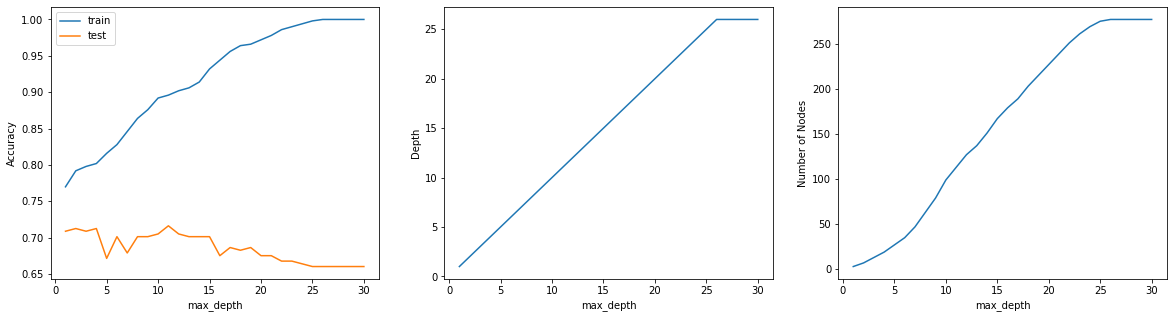

In [17]:
def plot_graph_classification(X_train, X_test, y_train, y_test, min_splits = 2):
    """
    Description:
        Plot the depth, the number of nodes and the classification accuracy on training samples and test samples by varying maximum depth levels of a decision tree from 1 to 15.
    Args:
        X_train, X_test, y_train, y_test (numpy array)

    Returns:
    """
    ### CODE HERE ###
    accuracy_train = []
    accuracy_test = []
    depth = []
    nodes = []
    
    for max_depth in progressbar(range(1, 31)):
        my_clf = DecisionTreeClassification(max_depth = max_depth, min_splits = min_splits)
        my_clf.fit(X_train, y_train)
        y_pred_train  = my_clf.predict(X_train)
        y_pred_test = my_clf.predict(X_test)
        accuracy_train.append(accuracy(y_train, y_pred_train))
        accuracy_test.append(accuracy(y_test, y_pred_test))
        depth_max = 0
        for i in range(len(my_clf.tree)):
            if(depth_max < my_clf.tree[i]['depth']):
                depth_max = my_clf.tree[i]['depth']
        depth.append(depth_max)
        nodes.append(len(my_clf.tree))
    
    f = plt.figure(figsize=(20,5))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    x = np.arange(1, 31)
    ax.plot(x, accuracy_train, label='train')
    ax.set_xlabel("max_depth")
    ax.set_ylabel("Accuracy")
    ax.plot(x, accuracy_test, label='test')
    ax.legend()
    
    ax2.plot(x, depth)
    ax2.set_xlabel("max_depth")
    ax2.set_ylabel("Depth")
    ax3.plot(x, nodes)
    ax3.set_xlabel("max_depth")
    ax3.set_ylabel("Number of Nodes")
plot_graph_classification(X_train, X_test, y_train, y_test, min_splits = 2)

The above figure shows the fitting results when different max_depths were applied with classification error method. We can first see that using classification error needed a lot more depth to reach 100% train accuracy. Train error, tree's depth, and number of nodes continuously increased until max_depth 26.
<p> This tells us that using classification error gives poorer splitting. If the criterion used to find the best split works well, the chosen feature and threshold quickly sorts the samples using smaller depth. The fact that increasing max_depth when using classifcation error did not increase training accuracy as fast as using gini impurity tells us that classification finds a less useful feature and threshold.</p>
<p> As a result, overfitting problem was not as serious as when gini impurity was used. It did not fit that well to training data. However, it did appear when max_depth was increased to 20~30.</p>

### Analysis of the results from P1

#### Accuracy

From the result above, we can see the accuracy changes by max_depth. Depth of the tree shows the complexity of the model. To avoid over fitting problems, maximum depth of model can be limited. The above figure shows the change in accuracy as maximum_depth increased.
<p> First, we can see the constant increase of accuracy for training error as max_depth increased. This tells us that allowing more depth makes the model to fit more closely to the given training data. As depth grows, each node is divided more and more so that there are no differences in a single node. For example, nodes continue dividing until there are no different target values. This means that the training error converges to 0. Besides, since we used 'stop if the split does not improve impurity' as a stop condition, the training error cannot decrease when max_depth increases. Therefore, we can see that the training accuracy continues to increase.</p>

<p> However, test accuracy shows a different aspect. The test accuracy increased dramatically at the start (from 1 to 2). However, the increase did not go long, but decreased again. This shows us that increasing max_depth made the model to fit to given training data too much. Therefore, the result tells us that max_depth 2 makes the best result - more fitting than underfitting, less than overfitting. </p>

#### Depth

Max_depth limits how deep the tree can grow. Therefore, we can expect that depth of the tree will grow as max_depth grows. 
<p> The above figure tells us that the expectation is only half right. From max_depth 1 to 12, the depth increased as max_depth increased. The depth reached as deep as max_depth allowed it to. However, the depth did not increase from 12 although max_depth increased from 12 to 13, and 14.</p>
<p> This is because, the model reached other stop conditions (all nodes have samples with same target values). Limiting maximum depth is an early stop condition. It is used to stop splitting before the samples within the node is divided enough so that all different values are splitted. However, if maximum depth is too large, the samples withing the node is already splitted before maximum depth is reached. Therefore, increasing maximum depth does not make deeper trees from certain point (in this case, 12).</p>
<p> We can see that this is true, because the model gives 100% accurate training accuracy starting from max_depth 12. This means that the model was fitted enough to the given samples within the depth limit. There was no need to make a deeper tree.</p>

#### Number of Nodes

When a node divides, it makes 2 more nodes. Therefore, increasing depth of a tree leads to exponential increase in number of nodes. We can see thi in smaller max_depth. The number of nodes increases exponentially.
<p> However, the speed of increase decreases from max_depth 7. This is because not many nodes divide to make 2 more nodes. When max_depth is limited to 7, many of the nodes are already made into a leaf node (because other stop conditions are met). Therefore, there are only small number of nodes that would divide further when max_depth is increased. As a result, the increase of nodes starts to decrease. </p>
<p> When max depth is limited to 12, all nodes are made into leaf nodes. Therefore, no more nodes are made and maintains its count.</p>